In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import geoplot as gplt
import geoplot.crs as gcrs

import warnings
import plotly.express as px

red = (1, 87/255, 0.2)

# Parte 1

## Exploración Inicial

Abrimos el dataframe y vemos las primeras y últimas filas.

In [2]:
df = pd.read_csv('../data/police_killings.csv', encoding = "ISO-8859-1")
df

name age  gender    raceethnicity     month  day  year  \
0    A'donte Washington  16    Male            Black  February   23  2015   
1        Aaron Rutledge  27    Male            White     April    2  2015   
2           Aaron Siler  26    Male            White     March   14  2015   
3          Aaron Valdez  25    Male  Hispanic/Latino     March   11  2015   
4          Adam Jovicic  29    Male            White     March   19  2015   
..                  ...  ..     ...              ...       ...  ...   ...   
462  William Chapman II  18    Male            Black     April   22  2015   
463    William Dick III  28    Male  Native American     April    4  2015   
464       William Poole  52    Male            White     March   16  2015   
465   Yuvette Henderson  38  Female            Black  February    3  2015   
466       Zaki Shinwary  48    Male          Unknown   January   16  2015   

                                 streetaddress          city state  ...  \
0                                 Clearview Ln     Millbrook    AL  ...   
1                       300 block Iris Park Dr     Pineville    LA  ...   
2                         22nd Ave and 56th St       Kenosha    WI  ...   
3                            3000 Seminole Ave    South Gate    CA  ...   
4                               364 Hiwood Ave  Munroe Falls    OH  ...   
..                                         ...           ...   ...  ...   
462                        1098 Frederick Blvd    Portsmouth    VA  ...   
463             Bureau of Indian Affairs Rd 66      Tonasket    WA  ...   
464                             130 Wedowee Ln        Gaston    NC  ...   
465                             3800 Hollis St       Oakland    CA  ...   
466  Lake Arrowhead Ave and Great Salt Lake Dr       Fremont    CA  ...   

     share_hispanic  p_income  h_income  county_income  comp_income  \
0               5.6     28375   51367.0          54766     0.937936   
1               0.5     14678   27972.0          40930     0.683411   
2              16.8     25286   45365.0          54930     0.825869   
3              98.8     17194   48295.0          55909     0.863814   
4               1.7     33954   68785.0          49669     1.384868   
..              ...       ...       ...            ...          ...   
462               0     25262   27418.0          46166     0.593900   
463            20.2     18470   35608.0          40368     0.882085   
464             0.3     21175   38200.0          42017     0.909156   
465            37.1     26971   63052.0          72112     0.874362   
466            12.3     33590   88940.0          72112     1.233359   

     county_bucket  nat_bucket   pov     urate   college  
0              3.0         3.0  14.1  0.097686  0.168510  
1              2.0         1.0  28.8  0.065724  0.111402  
2              2.0         3.0  14.6  0.166293  0.147312  
3              3.0         3.0  11.7  0.124827  0.050133  
4              5.0         4.0   1.9  0.063550  0.403954  
..             ...         ...   ...       ...       ...  
462            1.0         1.0  35.2  0.152047  0.120553  
463            1.0         2.0  27.3  0.133650  0.174525  
464            2.0         2.0  28.5  0.256150  0.072764  
465            2.0         4.0  23.9  0.069601  0.396476  
466            4.0         5.0   6.1  0.080912  0.435773  

[467 rows x 34 columns]

Para ver los tipos de datos de las columnas llamamos al `dtypes` del dataframe.

In [3]:
df.dtypes

name                     object
age                      object
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white              object
share_black              object
share_hispanic           object
p_income                 object
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_bucket              float64
pov     

Notamos que datos, como la edad por ejemplo, tienen un tipo que difiere del que debería. Esto se arreglará posteriormente en la segregación del dataframe.

Y para ver los datos nulos por columna hacemos:

In [4]:
df.isna().sum()

name                     0
age                      0
gender                   0
raceethnicity            0
month                    0
day                      0
year                     0
streetaddress            4
city                     0
state                    0
latitude                 0
longitude                0
state_fp                 0
county_fp                0
tract_ce                 0
geo_id                   0
county_id                0
namelsad                 0
lawenforcementagency     0
cause                    0
armed                    0
pop                      0
share_white              0
share_black              0
share_hispanic           0
p_income                 0
h_income                 2
county_income            0
comp_income              2
county_bucket           27
nat_bucket               2
pov                      0
urate                    2
college                  2
dtype: int64

Y para entender mejor la forma de la data debemos saber que representa cada columna:

- *name*: Nombre del fallecido
- *age*: Edad del fallecido
- *gender*: Género del fallecido
- *raceethnicity*: Raza o etnia del fallecido
- *month*: Mes del asesinato
- *day*: Día del asesinato
- *year*: Año del asesinato
- *streetadress*: Dirección de donde ocurrió el asesinato
- *city*: Ciudad donde ocurrió el asesinato
- *state*: Estado de USA donde ocurrió el asesinato
- *latitude*: Latitud de la dirección
- *longitude*: Longitud de la dirección
- *state_fp*: Código FIPS de identificación del estado donde ocurrió el asesinato
- *county_fp*: Código FIPS de identificación del condado donde ocurrió el asesinato
- *tract_ce*: Código de identificación del censo del distrito
- *geo_id*: Identificador geográfico
- *county_id*: Identificador del condado
- *namelsad*: Descripción del distrito censal
- *lawenforcementagency*: Comisaría involucrada en el incidente
- *cause*: Causa de muerte
- *armed*: Si el/la fallecido/da estaba armado/a y con que
- *pop*: Cantidad de población del distrito
- *share_white*: Porcentaje de población blanca no hispano/a del distrito
- *share_black*: Porcentaje de población negra del distrito
- *share_hipanic*: Porcentaje de población hispano/latino del distrito
- *p_income*: Promedio de ingreso por persona por distrito
- *h_income*: Promedio de ingreso por familia por distrito
- *county_income*: Promedio de ingreso por familia por condado
- *comp_income*: h_income/county_income
- *county_bucket*: Ingreso familiar, quintil dentro del condado
- *nat_bucket*: Ingreso familiar, qintil nacional
- *pov*: Tasa de pobreza a nivel distrito
- *urate*: Tasa de desempleo a nivel distrito
- *college*: Porcentaje de población de 25 o mas años con título universitario

Junto con la clasificación de cada tipo de variable:

- Variables cualitativas:
    - gender
    - race ethnicity
    - city
    - state
    - law enforcement agency
    - cause
    - armed
    
- Variables cualitativas despreciables
    - street address
    - namelsad
    - name

- Variables cuantitativas:
    - age
    - day
    - month
    - latitude/longitude
    - share_white 
    - share_black 
    - share_hispanic 
    - p_income
    - h_income
    - nat_bucket 
    - pov
    - urate 
    - college
    - county_income
    - county_bucket
    - nat_bucket
    - pop
    - comp_income   
   
- Variables cualitativas despreciables
    - year (pues todos los asesinatos del df ocurren en 2015)
    - state_fp
    - county_id
    - geo_id
    - tract_ce 
    - county_fp    

## Limpieza del Set de Datos

### Datos Nulos

Sabemos que el dataframe tiene bastantes datos nulos e inválidos los cuales debemos limpiar previo a realizar el análisis avanzado.

In [5]:
police_killings = df.copy().dropna(inplace=False)
police_killings

name age  gender    raceethnicity     month  day  year  \
0    A'donte Washington  16    Male            Black  February   23  2015   
1        Aaron Rutledge  27    Male            White     April    2  2015   
2           Aaron Siler  26    Male            White     March   14  2015   
3          Aaron Valdez  25    Male  Hispanic/Latino     March   11  2015   
4          Adam Jovicic  29    Male            White     March   19  2015   
..                  ...  ..     ...              ...       ...  ...   ...   
462  William Chapman II  18    Male            Black     April   22  2015   
463    William Dick III  28    Male  Native American     April    4  2015   
464       William Poole  52    Male            White     March   16  2015   
465   Yuvette Henderson  38  Female            Black  February    3  2015   
466       Zaki Shinwary  48    Male          Unknown   January   16  2015   

                                 streetaddress          city state  ...  \
0                                 Clearview Ln     Millbrook    AL  ...   
1                       300 block Iris Park Dr     Pineville    LA  ...   
2                         22nd Ave and 56th St       Kenosha    WI  ...   
3                            3000 Seminole Ave    South Gate    CA  ...   
4                               364 Hiwood Ave  Munroe Falls    OH  ...   
..                                         ...           ...   ...  ...   
462                        1098 Frederick Blvd    Portsmouth    VA  ...   
463             Bureau of Indian Affairs Rd 66      Tonasket    WA  ...   
464                             130 Wedowee Ln        Gaston    NC  ...   
465                             3800 Hollis St       Oakland    CA  ...   
466  Lake Arrowhead Ave and Great Salt Lake Dr       Fremont    CA  ...   

     share_hispanic  p_income  h_income  county_income  comp_income  \
0               5.6     28375   51367.0          54766     0.937936   
1               0.5     14678   27972.0          40930     0.683411   
2              16.8     25286   45365.0          54930     0.825869   
3              98.8     17194   48295.0          55909     0.863814   
4               1.7     33954   68785.0          49669     1.384868   
..              ...       ...       ...            ...          ...   
462               0     25262   27418.0          46166     0.593900   
463            20.2     18470   35608.0          40368     0.882085   
464             0.3     21175   38200.0          42017     0.909156   
465            37.1     26971   63052.0          72112     0.874362   
466            12.3     33590   88940.0          72112     1.233359   

     county_bucket  nat_bucket   pov     urate   college  
0              3.0         3.0  14.1  0.097686  0.168510  
1              2.0         1.0  28.8  0.065724  0.111402  
2              2.0         3.0  14.6  0.166293  0.147312  
3              3.0         3.0  11.7  0.124827  0.050133  
4              5.0         4.0   1.9  0.063550  0.403954  
..             ...         ...   ...       ...       ...  
462            1.0         1.0  35.2  0.152047  0.120553  
463            1.0         2.0  27.3  0.133650  0.174525  
464            2.0         2.0  28.5  0.256150  0.072764  
465            2.0         4.0  23.9  0.069601  0.396476  
466            4.0         5.0   6.1  0.080912  0.435773  

[436 rows x 34 columns]

Vemos que limpiamos los datos nulos:

In [6]:
police_killings.isna().sum()

name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           0
city                    0
state                   0
latitude                0
longitude               0
state_fp                0
county_fp               0
tract_ce                0
geo_id                  0
county_id               0
namelsad                0
lawenforcementagency    0
cause                   0
armed                   0
pop                     0
share_white             0
share_black             0
share_hispanic          0
p_income                0
h_income                0
county_income           0
comp_income             0
county_bucket           0
nat_bucket              0
pov                     0
urate                   0
college                 0
dtype: int64

### Drop de Variables Innecesarias

Como la variable año solo tiene como valor 2015 hardcodeado en todas las filas (pues el set de datos corresponde a asesinatos cometidos en 2015) podemos droppearlo pues no aporta información útil al análisis.

In [7]:
police_killings['year'].unique()

array([2015])

In [8]:
police_killings.drop(columns=['year'], inplace=True)

También droppearemos las variables `street address` pues preferimos analizar la latitud/longitud antes que una dirección y `namelsad` y `name` porque no son datos relevantes al análisis. 

In [9]:
police_killings.drop(columns=['streetaddress', 'namelsad', 'name'], inplace=True)

Por el lado de las variables cuantitativas droppearemos `state_fp`, `county_id`, `geo_id`, `tract_ce` y `county_fp` por ser IDs no relevantes para el análisis exploratorio.

In [10]:
police_killings.drop(columns=['state_fp', 'county_id', 'geo_id', 'tract_ce','county_fp'], inplace=True)

In [11]:
police_killings.T

0    \
age                                            16   
gender                                       Male   
raceethnicity                               Black   
month                                    February   
day                                            23   
city                                    Millbrook   
state                                          AL   
latitude                                32.529577   
longitude                              -86.362829   
lawenforcementagency  Millbrook Police Department   
cause                                     Gunshot   
armed                                          No   
pop                                          3779   
share_white                                  60.5   
share_black                                  30.5   
share_hispanic                                5.6   
p_income                                    28375   
h_income                                  51367.0   
county_income                               54766   
comp_income                              0.937936   
county_bucket                                 3.0   
nat_bucket                                    3.0   
pov                                          14.1   
urate                                    0.097686   
college                                   0.16851   

                                                  1    \
age                                                27   
gender                                           Male   
raceethnicity                                   White   
month                                           April   
day                                                 2   
city                                        Pineville   
state                                              LA   
latitude                                    31.321739   
longitude                                   -92.43486   
lawenforcementagency  Rapides Parish Sheriff's Office   
cause                                         Gunshot   
armed                                              No   
pop                                              2769   
share_white                                      53.8   
share_black                                      36.2   
share_hispanic                                    0.5   
p_income                                        14678   
h_income                                      27972.0   
county_income                                   40930   
comp_income                                  0.683411   
county_bucket                                     2.0   
nat_bucket                                        1.0   
pov                                              28.8   
urate                                        0.065724   
college                                      0.111402   

                                            2                             3    \
age                                          26                            25   
gender                                     Male                          Male   
raceethnicity                             White               Hispanic/Latino   
month                                     March                         March   
day                                          14                            11   
city                                    Kenosha                    South Gate   
state                                        WI                            CA   
latitude                               42.58356                     33.939298   
longitude                             -87.83571                   -118.219463   
lawenforcementagency  Kenosha Police Department  South Gate Police Department   
cause                                   Gunshot                       Gunshot   
armed                                        No                       Firearm   
pop                                        4079                          4343   
share_white                                73.8   

### Segregación por Tipo de Dato

Para facilitar el trabajo vamos a separar el dataframe en dos. Uno será utilizado para el análisis cuantitativo y el otro para el cualitativo.

In [12]:
columnas_cualitativas = ["gender", 
                         "raceethnicity", 
                         "month",
                         "city", 
                         "state", 
                         "lawenforcementagency", 
                         "cause", 
                         "armed"] 
columnas_cuantitativas = ["age",
                          "day",
                          "month",
                          "latitude",
                          "longitude",
                          "share_white", 
                          "share_black", 
                          "share_hispanic", 
                          "p_income",
                          "h_income",
                          "pov",
                          "urate", 
                          "college",
                          "county_income",
                          "county_bucket",
                          "nat_bucket",
                          "pop",
                          "comp_income"]

In [13]:
df_cualitativas = police_killings[columnas_cualitativas]
df_cualitativas.T

0    \
gender                                       Male   
raceethnicity                               Black   
month                                    February   
city                                    Millbrook   
state                                          AL   
lawenforcementagency  Millbrook Police Department   
cause                                     Gunshot   
armed                                          No   

                                                  1    \
gender                                           Male   
raceethnicity                                   White   
month                                           April   
city                                        Pineville   
state                                              LA   
lawenforcementagency  Rapides Parish Sheriff's Office   
cause                                         Gunshot   
armed                                              No   

                                            2                             3    \
gender                                     Male                          Male   
raceethnicity                             White               Hispanic/Latino   
month                                     March                         March   
city                                    Kenosha                    South Gate   
state                                        WI                            CA   
lawenforcementagency  Kenosha Police Department  South Gate Police Department   
cause                                   Gunshot                       Gunshot   
armed                                        No                       Firearm   

                                         4                          5    \
gender                                  Male                       Male   
raceethnicity                          White                      White   
month                                  March                      March   
city                            Munroe Falls                    Phoenix   
state                                     OH                         AZ   
lawenforcementagency  Kent Police Department  Phoenix Police Department   
cause                                Gunshot                    Gunshot   
armed                                     No                         No   

                                                6    \
gender                                         Male   
raceethnicity                       Hispanic/Latino   
month                                         March   
city                                    Bakersfield   
state                                            CA   
lawenforcementagency  Bakersfield Police Department   
cause                                       Gunshot   
armed                                       Firearm   

                                                7    \
gender                                         Male   
raceethnicity                       Hispanic/Latino   
month                                         March   
city                                     Wilmington   
state                                            CA   
lawenforcementagency  Los Angeles Police Department   
cause                                       Gunshot   
armed                            Non-lethal firearm   

                                                                  8    \
gender                                                           Male   
raceethnicity                                                   White   
month                                                         January   
city                                                           Sunset   
state                                                              TX   
lawenforcementagency  Wise County Sheriff's Department and Texas DPS    
cause                                                         Gunshot   
armed                                                         Firearm   

In [14]:
df_cuantitativas = police_killings[columnas_cuantitativas]
df_cuantitativas.T

0          1         2           3          4    \
age                    16         27        26          25         29   
day                    23          2        14          11         19   
month            February      April     March       March      March   
latitude        32.529577  31.321739  42.58356   33.939298  41.148575   
longitude      -86.362829  -92.43486 -87.83571 -118.219463 -81.429878   
share_white          60.5       53.8      73.8         1.2       92.5   
share_black          30.5       36.2       7.7         0.6        1.4   
share_hispanic        5.6        0.5      16.8        98.8        1.7   
p_income            28375      14678     25286       17194      33954   
h_income          51367.0    27972.0   45365.0     48295.0    68785.0   
pov                  14.1       28.8      14.6        11.7        1.9   
urate            0.097686   0.065724  0.166293    0.124827    0.06355   
college           0.16851   0.111402  0.147312    0.050133   0.403954   
county_income       54766      40930     54930       55909      49669   
county_bucket         3.0        2.0       2.0         3.0        5.0   
nat_bucket            3.0        1.0       3.0         3.0        4.0   
pop                  3779       2769      4079        4343       6809   
comp_income      0.937936   0.683411  0.825869    0.863814   1.384868   

                      5           6           7          8          9    ...  \
age                    29          22          35         44         31  ...   
day                     7          27          26         28          7  ...   
month               March       March       March    January   February  ...   
latitude         33.46938   35.395697    33.79305  30.665304  42.893238  ...   
longitude      -112.04332 -119.002745 -118.270926 -96.401482 -85.660584  ...   
share_white             7        50.8         8.6       14.6       63.6  ...   
share_black           7.7         0.3         0.2       17.7        7.7  ...   
share_hispanic         79        44.2        84.1       66.3       26.5  ...   
p_income            15523       25949       25043      16778      22005  ...   
h_income          20833.0     58068.0     66543.0    30391.0    44553.0  ...   
pov                    58        17.2        12.2       37.7       18.4  ...   
urate            0.073651    0.131461    0.094347   0.140833   0.174167  ...   
college          0.102955    0.203801    0.090438   0.047601   0.102692  ...   
county_income       53596       48552       55909      38310      51667  ...   
county_bucket         1.0         4.0         4.0        2.0        3.0  ...   
nat_bucket            1.0         4.0         4.0        1.0        2.0  ...   
pop                  4682        5027        5238       4832       3795  ...   
comp_income      0.388704    1.195996    1.190202   0.793292   0.862311  ...   

                      457        458        459        460        461  \
age                    50         40         35         53         59   
day                     4         29          5         10         25   
month               April    January   February      March    January   
latitude        32.899113    32.6786  34.044584  33.414931  39.749119   
longitude      -80.013802 -97.380737 -98.931198 -86.851557 -74.929306   
share_white          15.8       89.2       94.8       84.7       64.3   
share_black          65.2        0.9          0        1.4       16.9   
share_hispanic       18.6          6        2.5        7.7        4.9   
p_income            14963      54494      31761      42312      31470   
h_income          19988.0   102938.0    62817.0    81996.0    65759.0   
pov                  44.1       11.2          4          3        7.3   
urate            0.215909   0.027575    0.03452   0.035916   0.140866   
college           0.09295    0.71127   0.169804   0.627632   0.236107   
county_income       50792      56853      45086      45429      61683   
county_bucket     

# Análisis Cualitativo

Necesitamos generar gráficos de barra que muestren las cantidades de cada valor por feature. Para esto necesitamos tener un dataframe con todas las cantidades.

Vamos a mostrar como vamos a hacer esto para el género:

In [15]:
genderSize = df_cualitativas.groupby(['gender']).size()
df_genderSize = genderSize.to_frame(name='cantidad')
df_genderSize

cantidad
gender          
Female        22
Male         414

Este proceso, de creacion de dataframes lo vamos a repetir en un loop para cada feature cualitativo y luego los mergearemos en un único dataframe.

In [16]:
feature_size_df_list = []
for col in columnas_cualitativas:
    feature_size_df_list.append(df_cualitativas.groupby([col]).size().to_frame(name='cantidad'))
df_merged = pd.concat(feature_size_df_list, keys=columnas_cualitativas)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_merged)

cantidad
gender               Female                                                    22
                     Male                                                     414
raceethnicity        Asian/Pacific Islander                                    10
                     Black                                                    127
                     Hispanic/Latino                                           65
                     Native American                                            4
                     Unknown                                                   14
                     White                                                    216
month                April                                                     90
                     February                                                  82
                     January                                                   83
                     June                                                       1
                     March                                                    110
                     May                                                       70
city                 Albany                                                     1
                     Albuquerque                                                2
                     Allentown                                                  1
                     Aloha                                                      1
                     Alpine                                                     1
                     Alton                                                      1
                     Anaheim                                                    2
                     Anchorage                                                  2
                     Antioch                                                    1
                     Apple Valley                                               1
                     Arcola                                                     1
                     Arlington                                                  2
                     Assaria                                                    1
                     Atlanta                                                    3
                     Aurora                                                     2
                     Austin                                                     3
                     Bakersfield                                                3
                     Baltimore                                                  2
                     Baton Rouge                                                1
                     Bay City                                                   1
                     Bay Minette                                                1
                     Bay Shore                                                  1
                     Baytown                                                    1
                     Beacon                                                     1
                     Berlin                                                     1
                     Billings                                                   1
                     Birmingham                                                 2
                     Bisbee                                                     1
                     Bloomington                                                1
                     Boiling Springs                                            1
                     Boise                                                      1
                     Boulder                                                    1
                     Boulder City                                               1
                     Branford                                                   1
                     Burbank                           

Con estos datos calculados, podemos acceder al dataframe resultante para realizar los gráficos de barra pedidos:

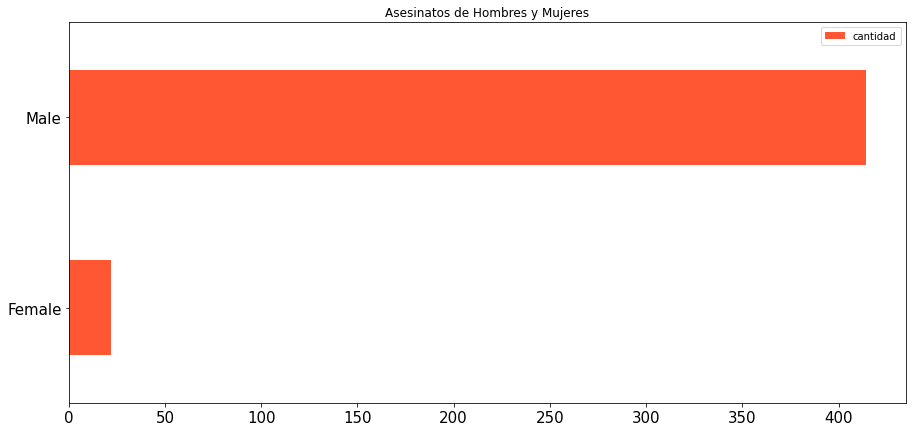

In [17]:
df_merged.loc['gender']\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Asesinatos de Hombres y Mujeres", figsize=(15,7));

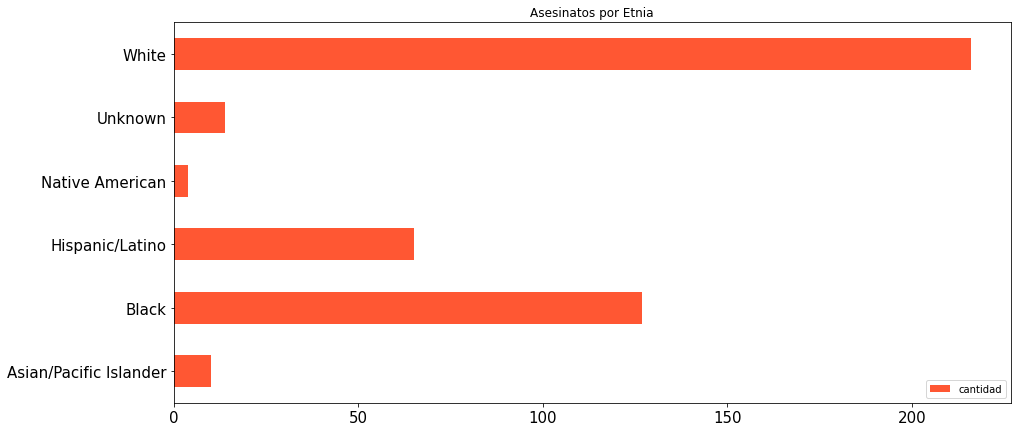

In [18]:
df_merged.loc['raceethnicity']\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Asesinatos por Etnia", figsize=(15,7));

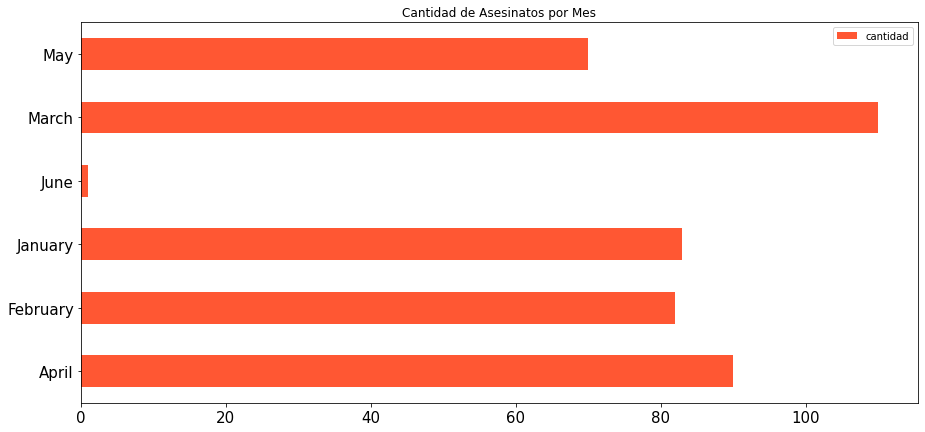

In [19]:
# Más arriba habíamos aclarado que el mes lo tomabamos como un dato cuantitativo, pero al estar
# codificado por el nombre en vez del número de mes, nos parecía bien incluirlo acá también 
# para ver, por nombre, que meses tienen las mayores cantidades de asesinatos.
df_merged.loc['month']\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Cantidad de Asesinatos por Mes", figsize=(15,7));

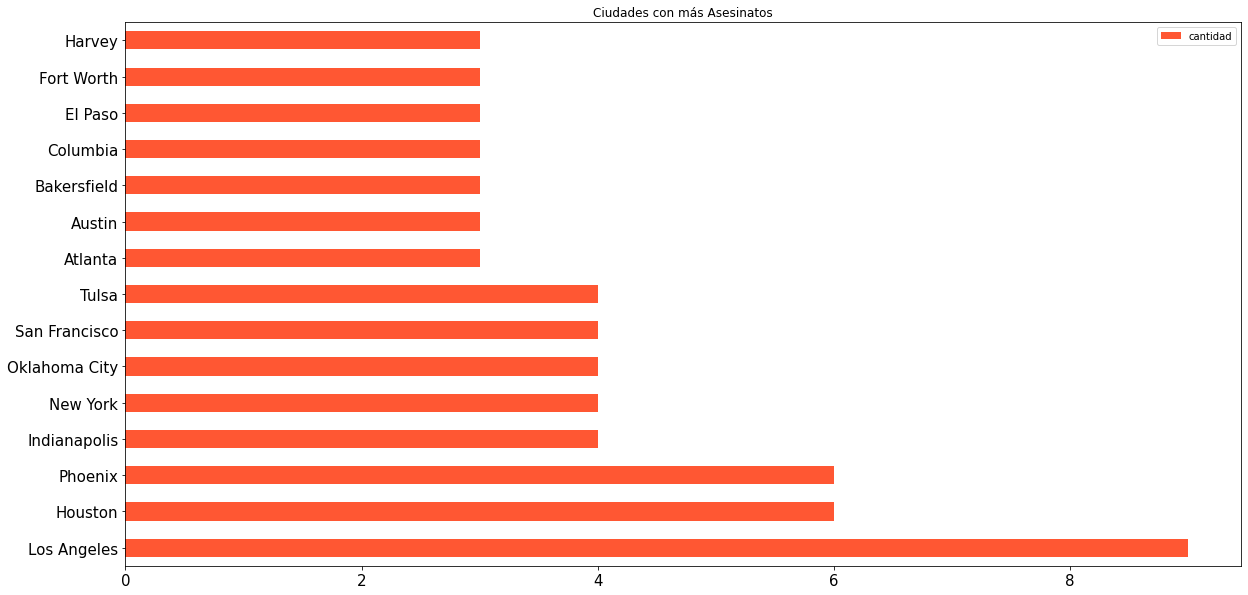

In [20]:
# Incluímos en el gráfico únicamente las 15 ciudades con más asesinatos. En caso de querer ver
# todos, comentar la llamada a nlargest(). 
df_merged.loc['city']\
         .nlargest(15,"cantidad")\
         .plot(kind='barh', color=[red], width=0.5, figsize=(20,10), fontsize=15, title="Ciudades con más Asesinatos");

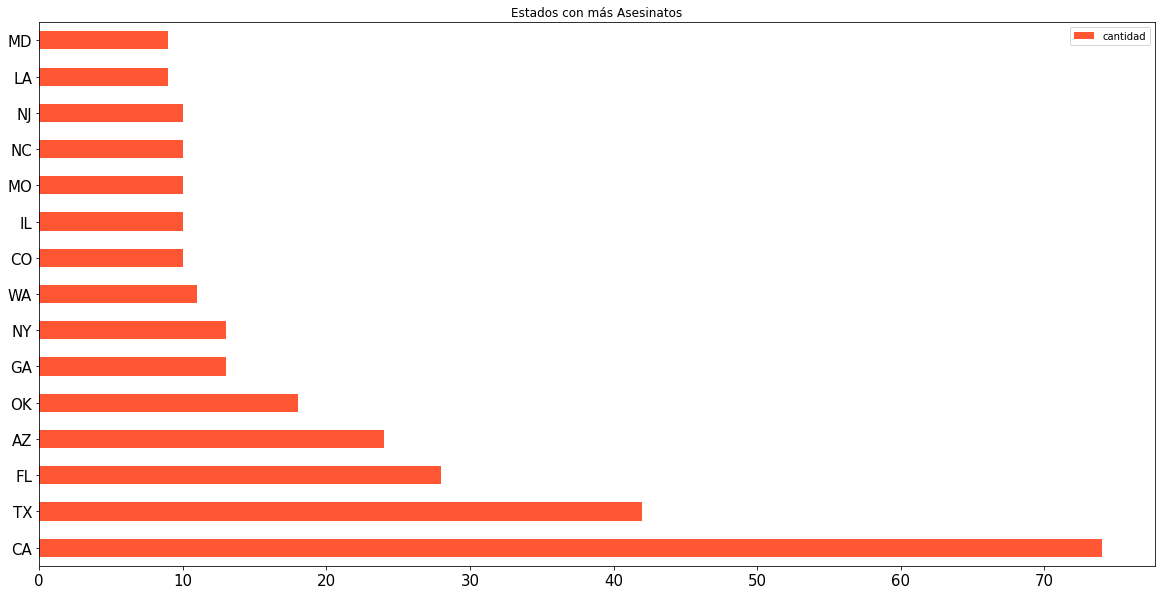

In [21]:
# Lo mismo que en la celda anterior; hay tantos estados que si en el gráfico se muestran todos
# los datos, el mismo perdería la capacidad de transmitir la información al lector.
df_merged.loc['state']\
         .nlargest(15,"cantidad")\
         .plot(kind='barh', color=[red], width=0.5, figsize=(20,10), fontsize=15, title="Estados con más Asesinatos");

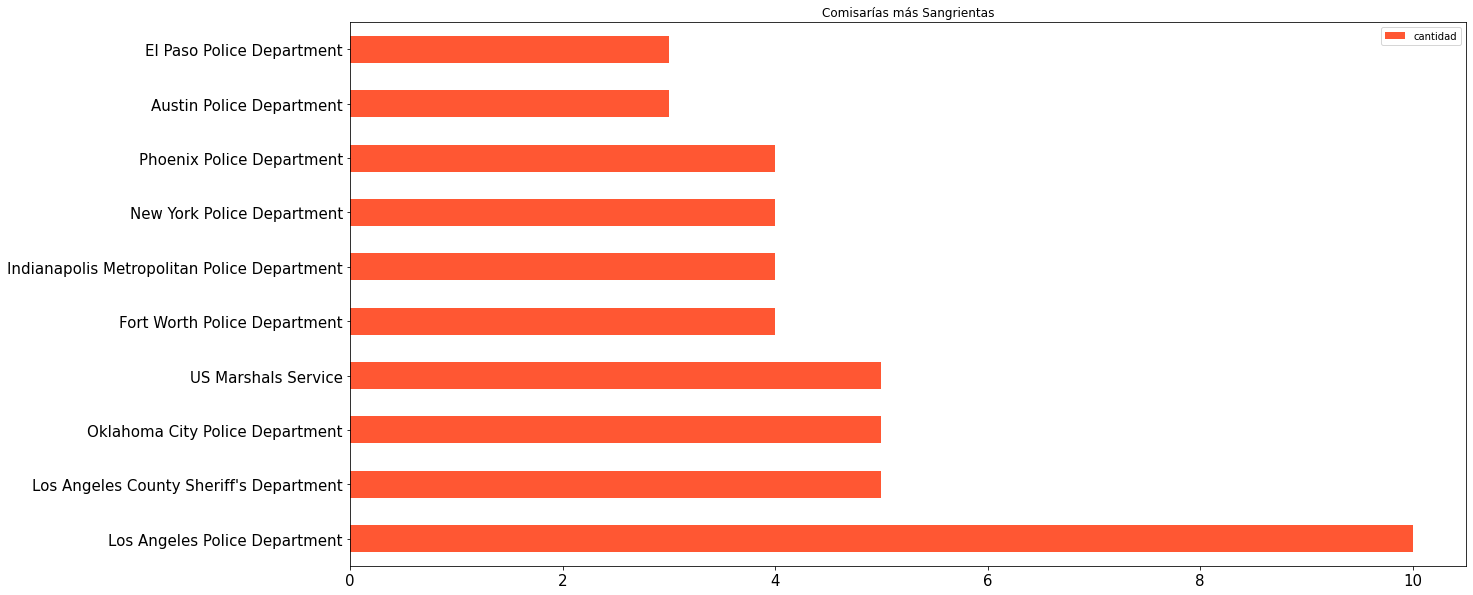

In [22]:
# Ídem el comentario de la celda anterior.
df_merged.loc["lawenforcementagency"]\
         .nlargest(10,"cantidad")\
         .plot(kind='barh', color=[red], width=0.5, figsize=(20,10), fontsize=15, title="Comisarías más Sangrientas");

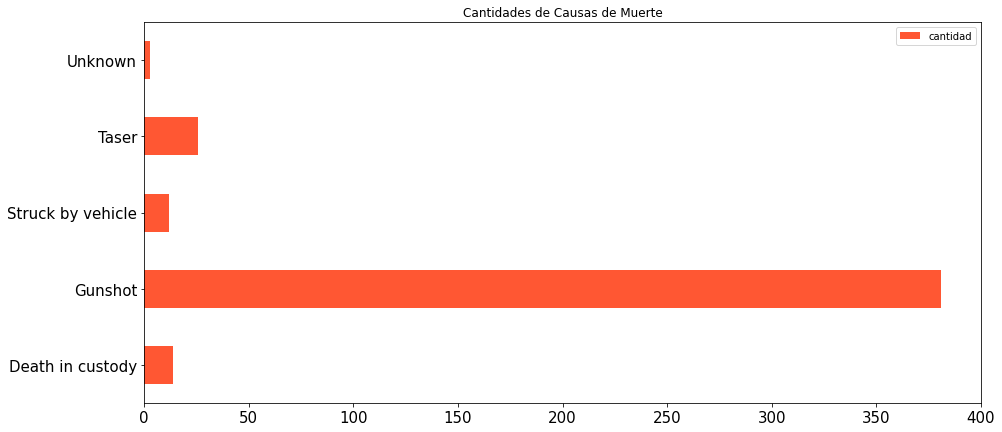

In [23]:
df_merged.loc["cause"]\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Cantidades de Causas de Muerte", figsize=(15,7));

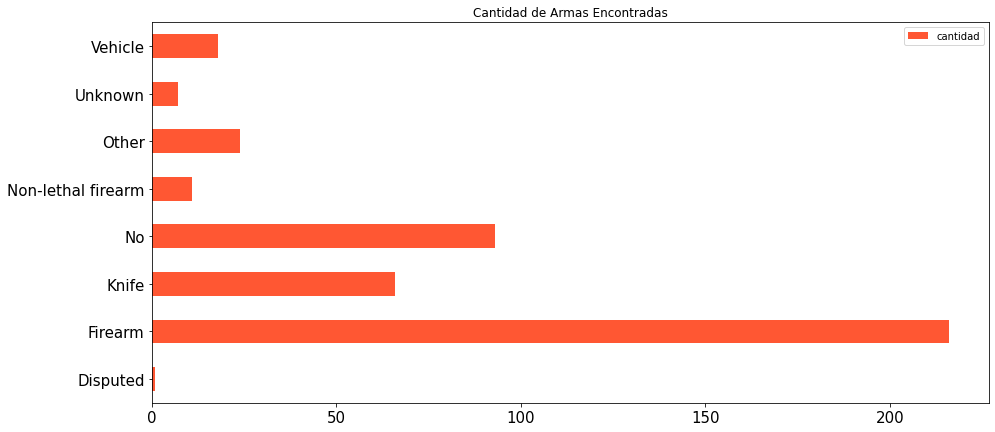

In [24]:
df_merged.loc["armed"]\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Cantidad de Armas Encontradas", figsize=(15,7));

## ¿Es posible realizar estos gráficos con un histograma?

No es posible representar correctamente las variables cualitativas en un histograma. Y decimos "correctamente" porque a pesar de que se pueda hacer:

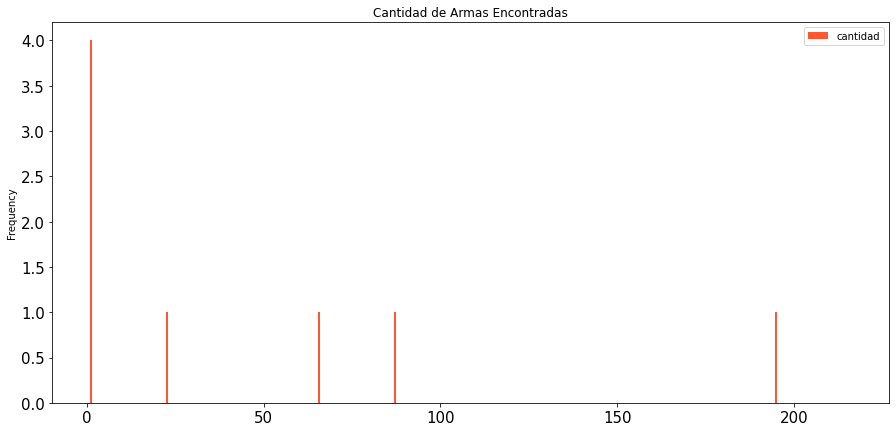

In [25]:
df_merged.loc["armed"]\
         .plot(kind='hist', color=[red], width=0.5, fontsize=15, title="Cantidad de Armas Encontradas", figsize=(15,7));

Notamos que no tiene sentido ver la frecuencia de las cantidades de armas encontradas. El histograma es bueno para graficar variables cuantitativas, donde podemos ver la distribución de las mismas.

La diferencia entre estos dos tipos de gráficos, es que el histograma muestra la frecuencia de los datos numéricos y el gráfico de barra muestra cuantas veces una categoría aparece, lo cual funciona mejor con variables discretas.

# Análisis Cuantitativo

# Parte 1

## Limpieza

Estas son las variables a analizar:

In [26]:
df_cuantitativas

age  day     month   latitude   longitude share_white share_black  \
0    16   23  February  32.529577  -86.362829        60.5        30.5   
1    27    2     April  31.321739  -92.434860        53.8        36.2   
2    26   14     March  42.583560  -87.835710        73.8         7.7   
3    25   11     March  33.939298 -118.219463         1.2         0.6   
4    29   19     March  41.148575  -81.429878        92.5         1.4   
..   ..  ...       ...        ...         ...         ...         ...   
462  18   22     April  36.829014  -76.341438        40.9        53.8   
463  28    4     April  48.708542 -119.436829        74.5         0.4   
464  52   16     March  35.205776  -81.240669        83.2        10.1   
465  38    3  February  37.827129 -122.284492        21.7        24.9   
466  48   16   January  37.586471 -122.060010        23.1           4   

    share_hispanic p_income  h_income   pov     urate   college  \
0              5.6    28375   51367.0  14.1  0.097686  0.168510   
1              0.5    14678   27972.0  28.8  0.065724  0.111402   
2             16.8    25286   45365.0  14.6  0.166293  0.147312   
3             98.8    17194   48295.0  11.7  0.124827  0.050133   
4              1.7    33954   68785.0   1.9  0.063550  0.403954   
..             ...      ...       ...   ...       ...       ...   
462              0    25262   27418.0  35.2  0.152047  0.120553   
463           20.2    18470   35608.0  27.3  0.133650  0.174525   
464            0.3    21175   38200.0  28.5  0.256150  0.072764   
465           37.1    26971   63052.0  23.9  0.069601  0.396476   
466           12.3    33590   88940.0   6.1  0.080912  0.435773   

     county_income  county_bucket  nat_bucket   pop  comp_income  
0            54766            3.0         3.0  3779     0.937936  
1            40930            2.0         1.0  2769     0.683411  
2            54930            2.0         3.0  4079     0.825869  
3            55909            3.0         3.0  4343     0.863814  
4            49669            5.0         4.0  6809     1.384868  
..             ...            ...         ...   ...          ...  
462          46166            1.0         1.0  1640     0.593900  
463          40368            1.0         2.0  4154     0.882085  
464          42017            2.0         2.0  3850     0.909156  
465          72112            2.0         4.0  2544     0.874362  
466          72112            4.0         5.0  5177     1.233359  

[436 rows x 18 columns]

Pero no todas son numéricas:

In [27]:
df_cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 466
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             436 non-null    object 
 1   day             436 non-null    int64  
 2   month           436 non-null    object 
 3   latitude        436 non-null    float64
 4   longitude       436 non-null    float64
 5   share_white     436 non-null    object 
 6   share_black     436 non-null    object 
 7   share_hispanic  436 non-null    object 
 8   p_income        436 non-null    object 
 9   h_income        436 non-null    float64
 10  pov             436 non-null    object 
 11  urate           436 non-null    float64
 12  college         436 non-null    float64
 13  county_income   436 non-null    int64  
 14  county_bucket   436 non-null    float64
 15  nat_bucket      436 non-null    float64
 16  pop             436 non-null    int64  
 17  comp_income     436 non-null    flo

Por lo que tenemos que castearlas y parsearlas en caso de no poder.

Parseamos los meses y los transformamos en números:

In [28]:
months = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}

df_cuantitativas['month'] = df_cuantitativas['month'].apply(lambda m: months[m])\
                                                     .astype(np.int8)
df_cuantitativas['month']

/tmp/ipykernel_9814/1398332432.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuantitativas['month'] = df_cuantitativas['month'].apply(lambda m: months[m])\


0      2
1      4
2      3
3      3
4      3
      ..
462    4
463    4
464    3
465    2
466    1
Name: month, Length: 436, dtype: int8

In [29]:
df_cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 466
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             436 non-null    object 
 1   day             436 non-null    int64  
 2   month           436 non-null    int8   
 3   latitude        436 non-null    float64
 4   longitude       436 non-null    float64
 5   share_white     436 non-null    object 
 6   share_black     436 non-null    object 
 7   share_hispanic  436 non-null    object 
 8   p_income        436 non-null    object 
 9   h_income        436 non-null    float64
 10  pov             436 non-null    object 
 11  urate           436 non-null    float64
 12  college         436 non-null    float64
 13  county_income   436 non-null    int64  
 14  county_bucket   436 non-null    float64
 15  nat_bucket      436 non-null    float64
 16  pop             436 non-null    int64  
 17  comp_income     436 non-null    flo

Para el resto de columnas casteamos el valor:

In [30]:
non_num_cols = ["age", "share_white", "share_black", "share_hispanic", "p_income", "pov"]

In [31]:
df_cuantitativas = df_cuantitativas[~df_cuantitativas["age"].isin(["Unknown"])]
df_cuantitativas["age"] = df_cuantitativas["age"].astype(np.int8)

/tmp/ipykernel_9814/3819774640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuantitativas["age"] = df_cuantitativas["age"].astype(np.int8)


In [32]:
df_cuantitativas["share_white"] = df_cuantitativas["share_white"].astype(np.float64)
df_cuantitativas["share_black"] = df_cuantitativas["share_black"].astype(np.float64)
df_cuantitativas["share_hispanic"] = df_cuantitativas["share_hispanic"].astype(np.float64)
df_cuantitativas["p_income"] = df_cuantitativas["p_income"].astype(np.float64)
df_cuantitativas["pov"] = df_cuantitativas["pov"].astype(np.float64)

/tmp/ipykernel_9814/3365605680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuantitativas["share_white"] = df_cuantitativas["share_white"].astype(np.float64)
/tmp/ipykernel_9814/3365605680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuantitativas["share_black"] = df_cuantitativas["share_black"].astype(np.float64)
/tmp/ipykernel_9814/3365605680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [33]:
df_cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 466
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             432 non-null    int8   
 1   day             432 non-null    int64  
 2   month           432 non-null    int8   
 3   latitude        432 non-null    float64
 4   longitude       432 non-null    float64
 5   share_white     432 non-null    float64
 6   share_black     432 non-null    float64
 7   share_hispanic  432 non-null    float64
 8   p_income        432 non-null    float64
 9   h_income        432 non-null    float64
 10  pov             432 non-null    float64
 11  urate           432 non-null    float64
 12  college         432 non-null    float64
 13  county_income   432 non-null    int64  
 14  county_bucket   432 non-null    float64
 15  nat_bucket      432 non-null    float64
 16  pop             432 non-null    int64  
 17  comp_income     432 non-null    flo

In [34]:
df_cuantitativas

age  day  month   latitude   longitude  share_white  share_black  \
0     16   23      2  32.529577  -86.362829         60.5         30.5   
1     27    2      4  31.321739  -92.434860         53.8         36.2   
2     26   14      3  42.583560  -87.835710         73.8          7.7   
3     25   11      3  33.939298 -118.219463          1.2          0.6   
4     29   19      3  41.148575  -81.429878         92.5          1.4   
..   ...  ...    ...        ...         ...          ...          ...   
462   18   22      4  36.829014  -76.341438         40.9         53.8   
463   28    4      4  48.708542 -119.436829         74.5          0.4   
464   52   16      3  35.205776  -81.240669         83.2         10.1   
465   38    3      2  37.827129 -122.284492         21.7         24.9   
466   48   16      1  37.586471 -122.060010         23.1          4.0   

     share_hispanic  p_income  h_income   pov     urate   college  \
0               5.6   28375.0   51367.0  14.1  0.097686  0.168510   
1               0.5   14678.0   27972.0  28.8  0.065724  0.111402   
2              16.8   25286.0   45365.0  14.6  0.166293  0.147312   
3              98.8   17194.0   48295.0  11.7  0.124827  0.050133   
4               1.7   33954.0   68785.0   1.9  0.063550  0.403954   
..              ...       ...       ...   ...       ...       ...   
462             0.0   25262.0   27418.0  35.2  0.152047  0.120553   
463            20.2   18470.0   35608.0  27.3  0.133650  0.174525   
464             0.3   21175.0   38200.0  28.5  0.256150  0.072764   
465            37.1   26971.0   63052.0  23.9  0.069601  0.396476   
466            12.3   33590.0   88940.0   6.1  0.080912  0.435773   

     county_income  county_bucket  nat_bucket   pop  comp_income  
0            54766            3.0         3.0  3779     0.937936  
1            40930            2.0         1.0  2769     0.683411  
2            54930            2.0         3.0  4079     0.825869  
3            55909            3.0         3.0  4343     0.863814  
4            49669            5.0         4.0  6809     1.384868  
..             ...            ...         ...   ...          ...  
462          46166            1.0         1.0  1640     0.593900  
463          40368            1.0         2.0  4154     0.882085  
464          42017            2.0         2.0  3850     0.909156  
465          72112            2.0         4.0  2544     0.874362  
466          72112            4.0         5.0  5177     1.233359  

[432 rows x 18 columns]

## Medidas Iniciales

Primero llamamos al método describe y lo visualizamos. Esta ya nos calcula varios de los valores pedidos en la consigna. 

In [35]:
# Muchas veces transponemos la matrix en las visualizaciones para tener una mejor 
# visión de la misma.
df_info = df_cuantitativas.describe().T
df_info

count          mean           std           min           25%  \
age             432.0     37.166667     12.971144     16.000000     27.000000   
day             432.0     15.530093      8.502437      1.000000      8.000000   
month           432.0      2.960648      1.340370      1.000000      2.000000   
latitude        432.0     36.473796      5.260529     19.915194     33.386750   
longitude       432.0    -97.235669     17.309240   -159.642700   -112.091190   
share_white     432.0     51.122454     30.012324      0.000000     25.150000   
share_black     432.0     18.108333     25.017959      0.000000      1.500000   
share_hispanic  432.0     22.470602     24.599478      0.000000      3.500000   
p_income        432.0  24360.886574   9190.468457   5457.000000  18163.750000   
h_income        432.0  46692.159722  20900.629249  10290.000000  32509.250000   
pov             432.0     21.221528     13.373120      1.100000     10.875000   
urate           432.0      0.118866      0.069763      0.011335      0.069108   
college         432.0      0.225399      0.161680      0.013547      0.107277   
county_income   432.0  53035.497685  12815.987528  24927.000000  45001.750000   
county_bucket   432.0      2.476852      1.387522      1.000000      1.000000   
nat_bucket      432.0      2.497685      1.308546      1.000000      1.000000   
pop             432.0   4792.583333   2352.745569    403.000000   3387.500000   
comp_income     432.0      0.887712      0.340778      0.184049      0.635171   

                         50%           75%            max  
age                35.000000     45.000000      87.000000  
day                15.000000     23.000000      31.000000  
month               3.000000      4.000000       5.000000  
latitude           35.929195     39.962914      61.218408  
longitude         -94.694237    -82.653629     -68.100007  
share_white        54.700000     76.825000      99.600000  
share_black         7.650000     22.850000      99.800000  
share_hispanic     12.600000     34.525000      98.800000  
p_income        22203.000000  28700.000000   86023.000000  
h_income        42563.000000  56728.000000  142500.000000  
pov                18.400000     28.825000      79.200000  
urate               0.106963      0.145203       0.507614  
college             0.171571      0.297123       0.828070  
county_income   51250.500000  56854.000000  110292.000000  
county_bucket       2.000000      4.000000       5.000000  
nat_bucket          2.000000      4.000000       5.000000  
pop              4447.500000   5758.000000   26826.000000  
comp_income         0.855741      1.077430       2.865216

El rango lo vamos a expresar como una dupla de $(\text{min},\text{max})$ y dejamos los features que no necesitamos.

In [36]:
df_info['range'] = df_info[['min', 'max']].apply(tuple, axis=1)
df_info.drop(columns=['count', 'std', 'min', '50%', 'max'], inplace = True)
df_info

mean           25%           75%  \
age                37.166667     27.000000     45.000000   
day                15.530093      8.000000     23.000000   
month               2.960648      2.000000      4.000000   
latitude           36.473796     33.386750     39.962914   
longitude         -97.235669   -112.091190    -82.653629   
share_white        51.122454     25.150000     76.825000   
share_black        18.108333      1.500000     22.850000   
share_hispanic     22.470602      3.500000     34.525000   
p_income        24360.886574  18163.750000  28700.000000   
h_income        46692.159722  32509.250000  56728.000000   
pov                21.221528     10.875000     28.825000   
urate               0.118866      0.069108      0.145203   
college             0.225399      0.107277      0.297123   
county_income   53035.497685  45001.750000  56854.000000   
county_bucket       2.476852      1.000000      4.000000   
nat_bucket          2.497685      1.000000      4.000000   
pop              4792.583333   3387.500000   5758.000000   
comp_income         0.887712      0.635171      1.077430   

                                      range  
age                            (16.0, 87.0)  
day                             (1.0, 31.0)  
month                            (1.0, 5.0)  
latitude             (19.915194, 61.218408)  
longitude       (-159.6427002, -68.1000068)  
share_white                     (0.0, 99.6)  
share_black                     (0.0, 99.8)  
share_hispanic                  (0.0, 98.8)  
p_income                  (5457.0, 86023.0)  
h_income                (10290.0, 142500.0)  
pov                             (1.1, 79.2)  
urate            (0.011335013, 0.507614213)  
college          (0.013547237, 0.828070175)  
county_income           (24927.0, 110292.0)  
county_bucket                    (1.0, 5.0)  
nat_bucket                       (1.0, 5.0)  
pop                        (403.0, 26826.0)  
comp_income       (0.18404908, 2.865216014)

Agregamos la mediana.

In [37]:
df_info['median'] = df_cuantitativas.median()
df_info

mean           25%           75%  \
age                37.166667     27.000000     45.000000   
day                15.530093      8.000000     23.000000   
month               2.960648      2.000000      4.000000   
latitude           36.473796     33.386750     39.962914   
longitude         -97.235669   -112.091190    -82.653629   
share_white        51.122454     25.150000     76.825000   
share_black        18.108333      1.500000     22.850000   
share_hispanic     22.470602      3.500000     34.525000   
p_income        24360.886574  18163.750000  28700.000000   
h_income        46692.159722  32509.250000  56728.000000   
pov                21.221528     10.875000     28.825000   
urate               0.118866      0.069108      0.145203   
college             0.225399      0.107277      0.297123   
county_income   53035.497685  45001.750000  56854.000000   
county_bucket       2.476852      1.000000      4.000000   
nat_bucket          2.497685      1.000000      4.000000   
pop              4792.583333   3387.500000   5758.000000   
comp_income         0.887712      0.635171      1.077430   

                                      range        median  
age                            (16.0, 87.0)     35.000000  
day                             (1.0, 31.0)     15.000000  
month                            (1.0, 5.0)      3.000000  
latitude             (19.915194, 61.218408)     35.929195  
longitude       (-159.6427002, -68.1000068)    -94.694237  
share_white                     (0.0, 99.6)     54.700000  
share_black                     (0.0, 99.8)      7.650000  
share_hispanic                  (0.0, 98.8)     12.600000  
p_income                  (5457.0, 86023.0)  22203.000000  
h_income                (10290.0, 142500.0)  42563.000000  
pov                             (1.1, 79.2)     18.400000  
urate            (0.011335013, 0.507614213)      0.106963  
college          (0.013547237, 0.828070175)      0.171571  
county_income           (24927.0, 110292.0)  51250.500000  
county_bucket                    (1.0, 5.0)      2.000000  
nat_bucket                       (1.0, 5.0)      2.000000  
pop                        (403.0, 26826.0)   4447.500000  
comp_income       (0.18404908, 2.865216014)      0.855741

Agregamos la moda y renombramos las columnas con los cuantiles pedidos para que tengan nombres más descriptivos.

In [38]:
df_info['mode'] = df_cuantitativas.mode().iloc[0]
df_info.rename(columns={'25%':'1st quantile', '75%':'3rd quantile'}, inplace = True)
df_info

mean  1st quantile  3rd quantile  \
age                37.166667     27.000000     45.000000   
day                15.530093      8.000000     23.000000   
month               2.960648      2.000000      4.000000   
latitude           36.473796     33.386750     39.962914   
longitude         -97.235669   -112.091190    -82.653629   
share_white        51.122454     25.150000     76.825000   
share_black        18.108333      1.500000     22.850000   
share_hispanic     22.470602      3.500000     34.525000   
p_income        24360.886574  18163.750000  28700.000000   
h_income        46692.159722  32509.250000  56728.000000   
pov                21.221528     10.875000     28.825000   
urate               0.118866      0.069108      0.145203   
college             0.225399      0.107277      0.297123   
county_income   53035.497685  45001.750000  56854.000000   
county_bucket       2.476852      1.000000      4.000000   
nat_bucket          2.497685      1.000000      4.000000   
pop              4792.583333   3387.500000   5758.000000   
comp_income         0.887712      0.635171      1.077430   

                                      range        median          mode  
age                            (16.0, 87.0)     35.000000     35.000000  
day                             (1.0, 31.0)     15.000000     17.000000  
month                            (1.0, 5.0)      3.000000      3.000000  
latitude             (19.915194, 61.218408)     35.929195     32.959941  
longitude       (-159.6427002, -68.1000068)    -94.694237   -111.978452  
share_white                     (0.0, 99.6)     54.700000     52.200000  
share_black                     (0.0, 99.8)      7.650000      0.000000  
share_hispanic                  (0.0, 98.8)     12.600000      0.000000  
p_income                  (5457.0, 86023.0)  22203.000000  14256.000000  
h_income                (10290.0, 142500.0)  42563.000000  28537.000000  
pov                             (1.1, 79.2)     18.400000      7.300000  
urate            (0.011335013, 0.507614213)      0.106963      0.066435  
college          (0.013547237, 0.828070175)      0.171571      0.057257  
county_income           (24927.0, 110292.0)  51250.500000  55909.000000  
county_bucket                    (1.0, 5.0)      2.000000      1.000000  
nat_bucket                       (1.0, 5.0)      2.000000      1.000000  
pop                        (403.0, 26826.0)   4447.500000   1548.000000  
comp_income       (0.18404908, 2.865216014)      0.855741      0.517190

# Parte 2

Ahora vamos a tomar varios subconjuntos de variables y plottearlos con un scatter_matrix para ver como se relacionan entre si.

Recordamos que en estos la diagonal del mismo representa la distribución de la variable $X$ en la coordenada $(X,X)$ y de lo contrario muestra el scatter_plot entre las variables $X,Y$ en las coordenadas $(X,Y)$

Primero tomaremos los porcentajes de etnicidades por distrito.

array([[<AxesSubplot:xlabel='share_white', ylabel='share_white'>,
        <AxesSubplot:xlabel='share_black', ylabel='share_white'>,
        <AxesSubplot:xlabel='share_hispanic', ylabel='share_white'>],
       [<AxesSubplot:xlabel='share_white', ylabel='share_black'>,
        <AxesSubplot:xlabel='share_black', ylabel='share_black'>,
        <AxesSubplot:xlabel='share_hispanic', ylabel='share_black'>],
       [<AxesSubplot:xlabel='share_white', ylabel='share_hispanic'>,
        <AxesSubplot:xlabel='share_black', ylabel='share_hispanic'>,
        <AxesSubplot:xlabel='share_hispanic', ylabel='share_hispanic'>]],
      dtype=object)

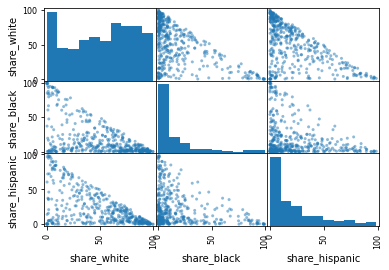

In [39]:
pd.plotting.scatter_matrix(df_cuantitativas[["share_white","share_black","share_hispanic"]])

Detectamos que hay una alta densidad de personas blancas en barrios donde se cometen asesinatos policiales. Luego vemos que la densidad es mayor en comunidades "más hispanas" y luego en comunidades "más negras".

En los scatter vemos que todas las variables tienen una correlación negativa entre si. Esto es esperable porque cuanto más porcentaje tenemos de una población, menos tendremos de otra. Graficamente esto se observa en los triángulos que se forman; las rectas de regresión que mejor se ajustan al módelo siempre tienen una pendiente negativa.

Ahora vamos a ver como se comportan las variables que indican el ingreso promedio personal e ingreso promedio por familia, ambas por distrito.

array([[<AxesSubplot:xlabel='p_income', ylabel='p_income'>,
        <AxesSubplot:xlabel='h_income', ylabel='p_income'>,
        <AxesSubplot:xlabel='urate', ylabel='p_income'>,
        <AxesSubplot:xlabel='college', ylabel='p_income'>],
       [<AxesSubplot:xlabel='p_income', ylabel='h_income'>,
        <AxesSubplot:xlabel='h_income', ylabel='h_income'>,
        <AxesSubplot:xlabel='urate', ylabel='h_income'>,
        <AxesSubplot:xlabel='college', ylabel='h_income'>],
       [<AxesSubplot:xlabel='p_income', ylabel='urate'>,
        <AxesSubplot:xlabel='h_income', ylabel='urate'>,
        <AxesSubplot:xlabel='urate', ylabel='urate'>,
        <AxesSubplot:xlabel='college', ylabel='urate'>],
       [<AxesSubplot:xlabel='p_income', ylabel='college'>,
        <AxesSubplot:xlabel='h_income', ylabel='college'>,
        <AxesSubplot:xlabel='urate', ylabel='college'>,
        <AxesSubplot:xlabel='college', ylabel='college'>]], dtype=object)

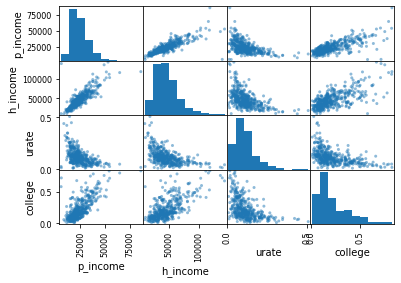

In [40]:
pd.plotting.scatter_matrix(df_cuantitativas[["p_income","h_income", "urate","college"]], )

Lo interesante de este gráfico es ver que a medida que crece el ingreso personal, tiende a crecer el ingreso familiar; la correlación es positiva. Esto lo sabemos tanto de forma intuitiva como de forma gráfica.

También vemos que en estos barrios, cuantos más títulos universitarios hay, más se gana (tanto por persona como por familia) y cuanto más desempleo hay menos se gana en promedio.

array([[<AxesSubplot:xlabel='pop', ylabel='pop'>,
        <AxesSubplot:xlabel='college', ylabel='pop'>],
       [<AxesSubplot:xlabel='pop', ylabel='college'>,
        <AxesSubplot:xlabel='college', ylabel='college'>]], dtype=object)

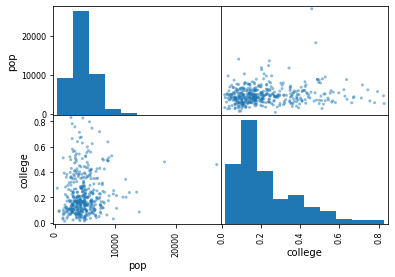

In [41]:
pd.plotting.scatter_matrix(df_cuantitativas[["pop","college"]])

Acá nos llevamos una sorpresa. Pensabamos que cuanta más población tuviese un distrito, más se intentaría invertir en educación y en consecuencia más personas tendrían títulos universitarios. Esto vemos en la data que no tiene correlación absoluta. 

Vamos ahora a calcular y graficar la matriz de correlación de datos (varios features como el día de asesinato, edad, coordenadas, no nos resultan útiles pues son datos aleatorios y no tiene sentido la correlación que puedan tener con otras variables).

In [42]:
to_compare = df_cuantitativas.drop(columns=['age','day','month','latitude','longitude'])
to_compare.corr(method='pearson')

share_white  share_black  share_hispanic  p_income  h_income  \
share_white        1.000000    -0.545542       -0.576426  0.359797  0.318851   
share_black       -0.545542     1.000000       -0.263087 -0.279139 -0.348456   
share_hispanic    -0.576426    -0.263087        1.000000 -0.232244 -0.136524   
p_income           0.359797    -0.279139       -0.232244  1.000000  0.833242   
h_income           0.318851    -0.348456       -0.136524  0.833242  1.000000   
pov               -0.490063     0.429788        0.201173 -0.695724 -0.752200   
urate             -0.399522     0.487762        0.018715 -0.507320 -0.517141   
college            0.351537    -0.222978       -0.305759  0.728439  0.676332   
county_income     -0.132068    -0.093994        0.122837  0.367706  0.457034   
county_bucket      0.390593    -0.305556       -0.192940  0.606246  0.717645   
nat_bucket         0.329979    -0.355081       -0.135593  0.797901  0.922036   
pop                0.071736    -0.158672        0.068777  0.200635  0.311905   
comp_income        0.454870    -0.367422       -0.213530  0.703781  0.821628   

                     pov     urate   college  county_income  county_bucket  \
share_white    -0.490063 -0.399522  0.351537      -0.132068       0.390593   
share_black     0.429788  0.487762 -0.222978      -0.093994      -0.305556   
share_hispanic  0.201173  0.018715 -0.305759       0.122837      -0.192940   
p_income       -0.695724 -0.507320  0.728439       0.367706       0.606246   
h_income       -0.752200 -0.517141  0.676332       0.457034       0.717645   
pov             1.000000  0.599317 -0.466162      -0.297656      -0.619254   
urate           0.599317  1.000000 -0.482530      -0.199613      -0.439815   
college        -0.466162 -0.482530  1.000000       0.324492       0.451124   
county_income  -0.297656 -0.199613  0.324492       1.000000      -0.111748   
county_bucket  -0.619254 -0.439815  0.451124      -0.111748       1.000000   
nat_bucket     -0.768054 -0.493707  0.613620       0.439273       0.727730   
pop            -0.290776 -0.219192  0.120229       0.147671       0.269528   
comp_income    -0.704634 -0.484849  0.538439      -0.089069       0.893521   

                nat_bucket       pop  comp_income  
share_white       0.329979  0.071736     0.454870  
share_black      -0.355081 -0.158672    -0.367422  
share_hispanic   -0.135593  0.068777    -0.213530  
p_income          0.797901  0.200635     0.703781  
h_income          0.922036  0.311905     0.821628  
pov              -0.768054 -0.290776    -0.704634  
urate            -0.493707 -0.219192    -0.484849  
college           0.613620  0.120229     0.538439  
county_income     0.439273  0.147671    -0.089069  
county_bucket     0.727730  0.269528     0.893521  
nat_bucket        1.000000  0.317710     0.773742  
pop               0.317710  1.000000     0.266913  
comp_income       0.773742  0.266913     1.000000

<AxesSubplot:>

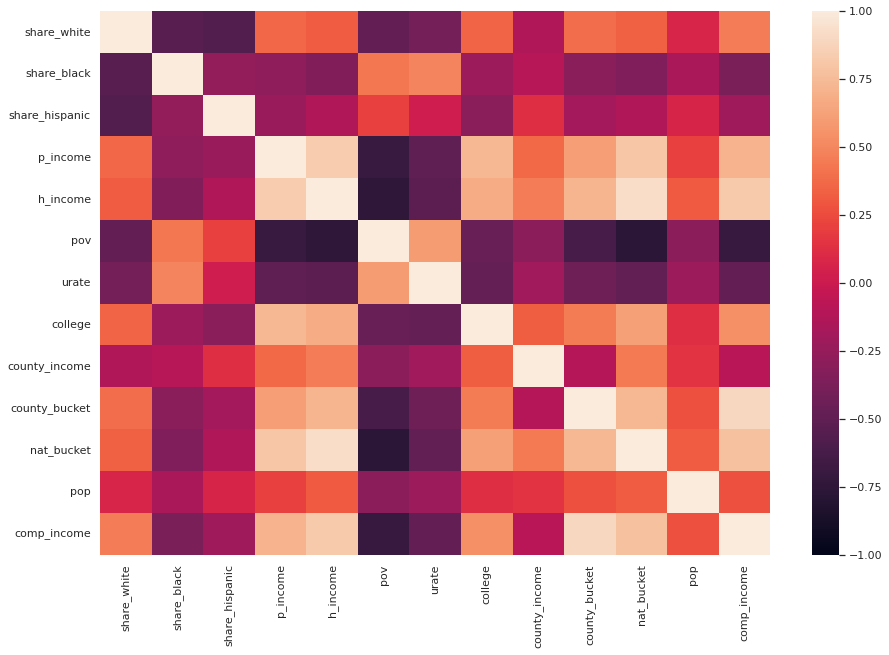

In [43]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(to_compare.corr(method='pearson'),vmin=-1, vmax=1)

Notamos que contrario a lo que creíamos, la correlación de pearson entre la población y la cantidad de títulos universitarios tiende a cero. La pobreza y el desempleo se correlacionan inversamente con las variables que representan ingresos. También vemos que las variables que hablan de las etnias no están fuertemente correlacionadas con casi ninguna otra variable.

# Parte 3

In [44]:
df_cuantitativas.T

0             1             2             3    \
age                16.000000     27.000000     26.000000     25.000000   
day                23.000000      2.000000     14.000000     11.000000   
month               2.000000      4.000000      3.000000      3.000000   
latitude           32.529577     31.321739     42.583560     33.939298   
longitude         -86.362829    -92.434860    -87.835710   -118.219463   
share_white        60.500000     53.800000     73.800000      1.200000   
share_black        30.500000     36.200000      7.700000      0.600000   
share_hispanic      5.600000      0.500000     16.800000     98.800000   
p_income        28375.000000  14678.000000  25286.000000  17194.000000   
h_income        51367.000000  27972.000000  45365.000000  48295.000000   
pov                14.100000     28.800000     14.600000     11.700000   
urate               0.097686      0.065724      0.166293      0.124827   
college             0.168510      0.111402      0.147312      0.050133   
county_income   54766.000000  40930.000000  54930.000000  55909.000000   
county_bucket       3.000000      2.000000      2.000000      3.000000   
nat_bucket          3.000000      1.000000      3.000000      3.000000   
pop              3779.000000   2769.000000   4079.000000   4343.000000   
comp_income         0.937936      0.683411      0.825869      0.863814   

                         4             5             6             7    \
age                29.000000     29.000000     22.000000     35.000000   
day                19.000000      7.000000     27.000000     26.000000   
month               3.000000      3.000000      3.000000      3.000000   
latitude           41.148575     33.469380     35.395697     33.793050   
longitude         -81.429878   -112.043320   -119.002745   -118.270926   
share_white        92.500000      7.000000     50.800000      8.600000   
share_black         1.400000      7.700000      0.300000      0.200000   
share_hispanic      1.700000     79.000000     44.200000     84.100000   
p_income        33954.000000  15523.000000  25949.000000  25043.000000   
h_income        68785.000000  20833.000000  58068.000000  66543.000000   
pov                 1.900000     58.000000     17.200000     12.200000   
urate               0.063550      0.073651      0.131461      0.094347   
college             0.403954      0.102955      0.203801      0.090438   
county_income   49669.000000  53596.000000  48552.000000  55909.000000   
county_bucket       5.000000      1.000000      4.000000      4.000000   
nat_bucket          4.000000      1.000000      4.000000      4.000000   
pop              6809.000000   4682.000000   5027.000000   5238.000000   
comp_income         1.384868      0.388704      1.195996      1.190202   

                         8             9    ...           457            458  \
age                44.000000     31.000000  ...     50.000000      40.000000   
day                28.000000      7.000000  ...      4.000000      29.000000   
month               1.000000      2.000000  ...      4.000000       1.000000   
latitude           30.665304     42.893238  ...     32.899113      32.678600   
longitude         -96.401482    -85.660584  ...    -80.013802     -97.380737   
share_white        14.600000     63.600000  ...     15.800000      89.200000   
share_black        17.700000      7.700000  ...     65.200000       0.900000   
share_hispanic     66.300000     26.500000  ...     18.600000       6.000000   
p_income        16778.000000  22005.000000  ...  14963.000000   54494.000000   
h_income        30391.000000  44553.000000  ...  19988.000000  102938.000000   
pov                37.700000     18.400000  ...     44.100000      11.200000   
urate               0.140833      0.174167  ...      0.215909       0.027575   
college             0.047601      0.102692  ...      0.092950       0.711270   
county_income   38310.000000  51667.000000  ...  50792.000000   56853.000000   
county_buck

## Violin Plot

Este violinplot indica que la media de ingresos personales ronda a los 20000 (suponiendo que es en dólares anuales) y la media del ingreso familiar ronda los 40000. La mayoría de los ingresos personales están acumulados alrededor de la media (es decir, entre los 10000 y 30000) mientras que el ingreso familiar tiende a estar más uniformemente distribuído. Estos valores difieren bastante de la [media general](https://data.census.gov/cedsci/table?tid=ACSDP5Y2015.DP03) donde el ingreso por familia promedio en USA en 2015 es de 53889 dólares anuales.

<AxesSubplot:>

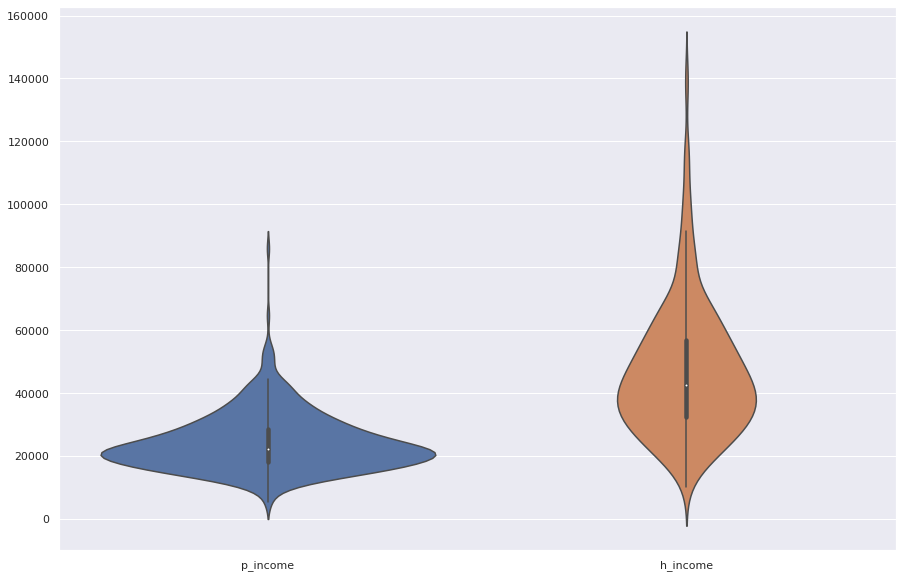

In [45]:
sns.violinplot(data=df_cuantitativas[['p_income', 'h_income']])

## Box Plot

Vamos a normalizar el nivel de pobreza para que pueda ser un valor que se mueva en un rango de $[0,1]$ y así poder graficarlo con las otras variables del mismo rango.

In [46]:
calidad_de_vida = df_cuantitativas[['pov', 'urate']]
calidad_de_vida['norm_pov'] = calidad_de_vida['pov'] / 100
calidad_de_vida.drop(columns=['pov'], inplace=True)
calidad_de_vida

/tmp/ipykernel_9814/3964710574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calidad_de_vida['norm_pov'] = calidad_de_vida['pov'] / 100
/tmp/ipykernel_9814/3964710574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calidad_de_vida.drop(columns=['pov'], inplace=True)


urate  norm_pov
0    0.097686     0.141
1    0.065724     0.288
2    0.166293     0.146
3    0.124827     0.117
4    0.063550     0.019
..        ...       ...
462  0.152047     0.352
463  0.133650     0.273
464  0.256150     0.285
465  0.069601     0.239
466  0.080912     0.061

[432 rows x 2 columns]

Vemos como la media de pobreza tiende a ser de un 0.2 y los rangos de los cuantiles son (aproximadamente) de $(0,0.11,0.19,0.55)$; estos barrios suelen tener tendencias a concentrar relativamente altos niveles de pobreza.

En el caso del desempleo, los valores tienden a ser bajos, con una media aproximada del $0.1$.

<AxesSubplot:>

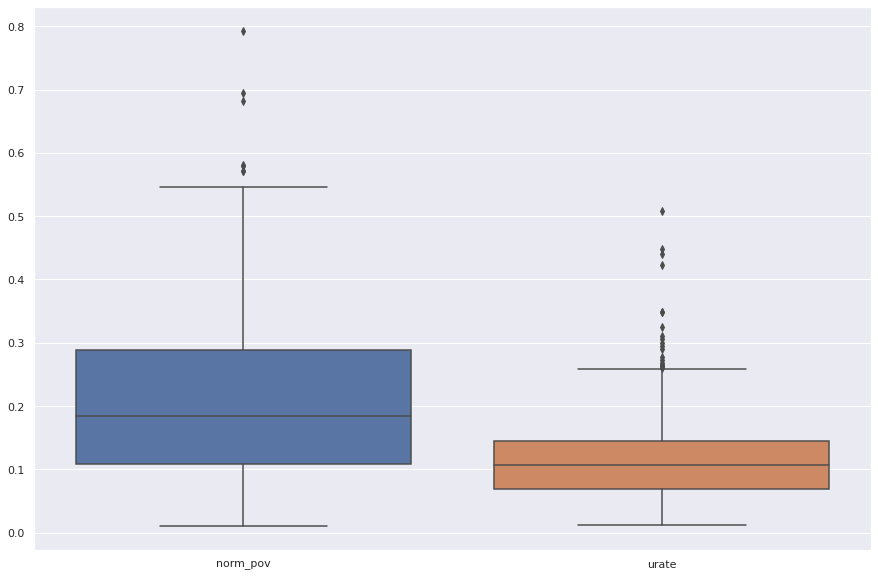

In [47]:
sns.boxplot(data=calidad_de_vida[['norm_pov', 'urate']])

## Density Plot

La mayoría de personas asesinadas por policías tienden a estar entre los 20 y 40 años.

<AxesSubplot:title={'center':'Distribución de la Edad de Asesinados'}, ylabel='Density'>

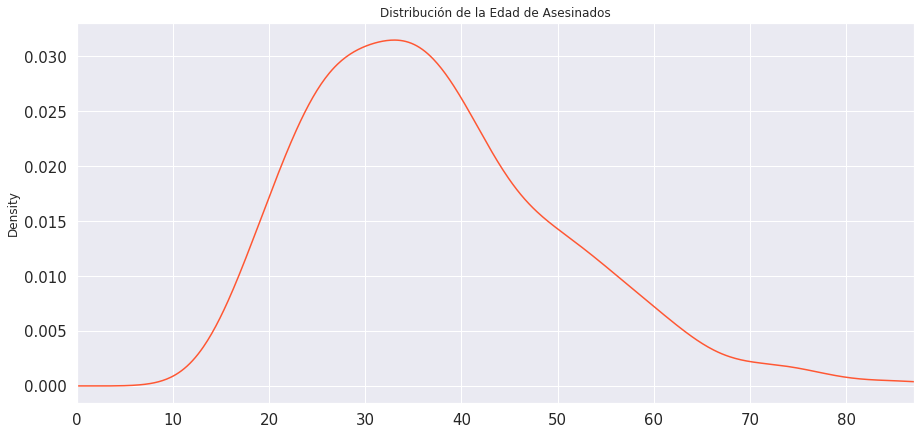

In [48]:
maxage = df_cuantitativas['age'].max()
df_cuantitativas.age\
                .plot(xlim=[0,maxage] ,kind='density', color=[red], fontsize=15, title="Distribución de la Edad de Asesinados", figsize=(15,7))

## Histogram

Mientras que los niveles de pobreza tienden a estar acumulados entre el 5% y el 25%.

<AxesSubplot:>

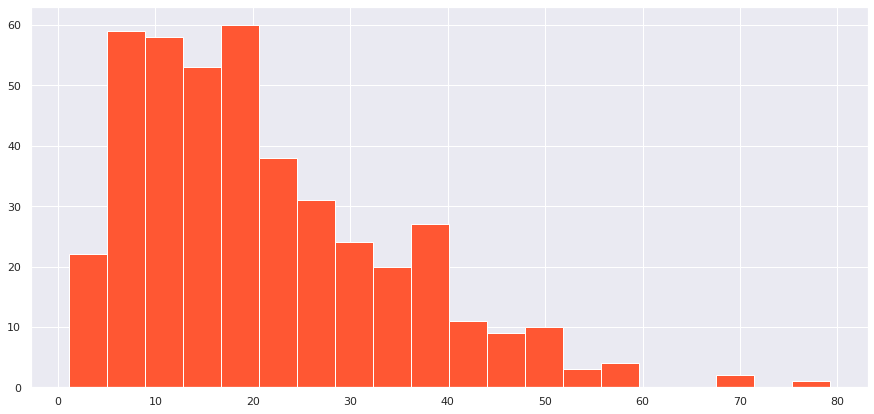

In [49]:
df_cuantitativas.pov.hist(bins=20, color=[red], figsize=(15,7))

## Pie Plot

In [50]:
ethnicities = df_cuantitativas.filter(like='share')
ethnicities['other'] = 100 - (ethnicities['share_white'] + 
                              ethnicities['share_black'] + 
                              ethnicities['share_hispanic'])
ethnicities

/tmp/ipykernel_9814/1527514467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethnicities['other'] = 100 - (ethnicities['share_white'] +


share_white  share_black  share_hispanic  other
0           60.5         30.5             5.6    3.4
1           53.8         36.2             0.5    9.5
2           73.8          7.7            16.8    1.7
3            1.2          0.6            98.8   -0.6
4           92.5          1.4             1.7    4.4
..           ...          ...             ...    ...
462         40.9         53.8             0.0    5.3
463         74.5          0.4            20.2    4.9
464         83.2         10.1             0.3    6.4
465         21.7         24.9            37.1   16.3
466         23.1          4.0            12.3   60.6

[432 rows x 4 columns]

In [51]:
mean_shares = pd.DataFrame({'mean_share': ethnicities.mean()})
mean_shares['names'] = ['white', 'black', 'hispanic', 'other']
mean_shares

mean_share     names
share_white      51.122454     white
share_black      18.108333     black
share_hispanic   22.470602  hispanic
other             8.298611     other

Para este pie chart vamos a utilizar la librería *plotly*.

In [52]:
# Esta librería necesita que configuremos el modo offline para poder
# renderizar los gráficos en nuestro notebook local.

import plotly.offline as pyo
pyo.init_notebook_mode()

px.pie(mean_shares, values='mean_share', names='names', title='Promedio del Porcentajes de Etnias de Barrios con Asesinatos Policiales')\
  .show()

Este gráfico nos muestra el promedio de porcentajes de etnias en los distritos donde ocurren asesinatos policiales. La tendencia muestra que estos promedios difieren de las [estadísticas nacionales](https://data.census.gov/cedsci/table?tid=ACSDP5Y2015.DP05) donde el porcentaje de personas blancas en USA en 2015 tiende a ser del 62.3% el de personas negras de 12.3% y 17.1% de hispanos.

## Asesinatos en el Mapa

In [53]:
coords = df_cuantitativas[["latitude", "longitude"]]

# Sacamos los asesinatos que ocurren en Alaska y diferentes islas que dificultan la 
# visualización que queremos realizar.

coords = coords.loc[coords["longitude"] > -140]
coords

latitude   longitude
0    32.529577  -86.362829
1    31.321739  -92.434860
2    42.583560  -87.835710
3    33.939298 -118.219463
4    41.148575  -81.429878
..         ...         ...
462  36.829014  -76.341438
463  48.708542 -119.436829
464  35.205776  -81.240669
465  37.827129 -122.284492
466  37.586471 -122.060010

[426 rows x 2 columns]

*For fun* vamos a ver en el mapa, usando la librería geoplot, como aparecen los asesinatos cometidos.

/tmp/ipykernel_9814/3553141943.py:6: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



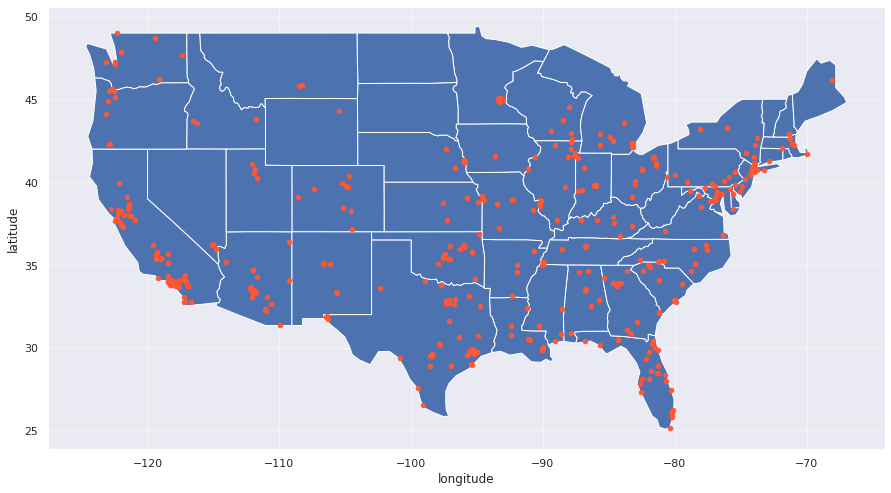

In [54]:
fig, ax = plt.subplots(figsize=(15,20))
gpd.read_file(gplt.datasets.get_path('contiguous_usa'))\
   .plot(ax=ax)

coords.plot(ax=ax, x="longitude", y="latitude", kind="scatter", color=red)
ax.grid(b=True, alpha=0.5)
plt.show()

In [55]:
coords[coords['longitude'] > -100].count()

latitude     277
longitude    277
dtype: int64

In [56]:
coords[coords['longitude'] < -100].count()

latitude     149
longitude    149
dtype: int64

La mayoría de los asesinatos se cometen en la costa este.

# Conclusiones de la Parte 1

Con respecto a las variables cualitativas los datos mas interesantes son que la gran mayoría de asesinatos policiales se cometen contra hombres, por arma de fuego, donde el asesinado muy probablemente estaba armado con algún tipo de arma letal. Esta información se obtuvo en los gráficos de barra de dichas variables.

# Parte 2

## Introducción al Set de Datos

Se nos provee de un dataframe que contiene información de diferentes canciones de Spotify. Se debe realizar un análisis exploratorio del mismo.

TO DO:

- Sacar los min/max y cambiarlo por un `df.describe()`
- Sacar warnings

## Limpieza del Dataframe

In [57]:
df = pd.read_csv('../data/dataset_spotify.csv')
df.head()

genre  popularity acousticness danceability  duration_ms   energy liveness  \
0  Dance          99        0,04         0,73        190440    0,55     0,11    
1  Dance          83        0,11         0,78        208787    0,61     0,13    
2  Dance          87        0,04         0,74        222653    0,64     0,35    
3  Dance          78        0,02         0,59        220573    0,70     0,06    
4  Dance          72        0,42         0,73        200773    0,65     0,09    

   loudness speechiness      tempo  valence  Unnamed: 11     Unnamed: 12  \
0    (5,29)       0,09     170,00     0,34           NaN         Cluster   
1    (4,59)       0,05     100,07     0,80           NaN           genre   
2    (4,55)       0,04     105,01     0,57           NaN      popularity   
3    (5,33)       0,04     104,96     0,25           NaN   acousticness    
4    (4,39)       0,05     103,98     0,46           NaN   danceability    

                                        Unnamed: 13 Unnamed: 14  \
0                                               NaN         NaN   
1                                            Género     musical   
2               índice de popularidad de la canción         NaN   
3  medida de confianza de si la canción es acústica         NaN   
4                       adecuación para ser bailada         NaN   

       Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  
0              NaN         NaN         NaN         NaN  
1  correspondiente           a          la    canción.  
2              NaN         NaN         NaN         NaN  
3              NaN         NaN         NaN         NaN  
4              NaN         NaN         NaN         NaN

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   int64  
 2   acousticness  1000 non-null   object 
 3   danceability  1000 non-null   object 
 4   duration_ms   1000 non-null   int64  
 5   energy        1000 non-null   object 
 6   liveness      1000 non-null   object 
 7   loudness      1000 non-null   object 
 8   speechiness   1000 non-null   object 
 9   tempo         1000 non-null   object 
 10  valence       1000 non-null   object 
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   12 non-null     object 
 13  Unnamed: 13   11 non-null     object 
 14  Unnamed: 14   1 non-null      object 
 15  Unnamed: 15   1 non-null      object 
 16  Unnamed: 16   1 non-null      object 
 17  Unnamed: 17   1 non-null      object 
 18  Unnamed: 18   1 non-null     

Tenemos nuestro dataframe importado. Por lo que ahora debemos limpiarlo y hacer el preprocesamiento previo al análisis exploratorio. Debemos:

- Quitar las columnas y valores NaN/nulos.
- Tomar los campos que son `Object` y parsearlos a los campos numéricos correspondientes.
- Cambiar los tipos de las columnas para disminuir el tamaño que necesita el dataframe.

### Extracción de Valores Nulos

Las siguientes columnas se autogeneraron pues el `.csv` descargado desde el excel tienen datos nulos o metadata que ya fue extraída para el análisis a realizar:

In [59]:
unnamedColumns = list(df.filter(regex='Unnamed'))
unnamedColumns

['Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [60]:
df = df[df.columns.drop(unnamedColumns)]
df

genre  popularity acousticness danceability  duration_ms   energy  \
0    Dance          99        0,04         0,73        190440    0,55    
1    Dance          83        0,11         0,78        208787    0,61    
2    Dance          87        0,04         0,74        222653    0,64    
3    Dance          78        0,02         0,59        220573    0,70    
4    Dance          72        0,42         0,73        200773    0,65    
..     ...         ...          ...          ...          ...      ...   
995   Soul          42        0,73         0,59        146693    0,38    
996   Soul          43        0,00         0,45        175427    0,64    
997   Soul          41        0,00         0,51        303640    0,62    
998   Soul          44        0,43         0,67        246787    0,57    
999   Soul          42        0,06         0,78        200533    0,38    

    liveness  loudness speechiness      tempo  valence  
0      0,11     (5,29)       0,09     170,00     0,34   
1      0,13     (4,59)       0,05     100,07     0,80   
2      0,35     (4,55)       0,04     105,01     0,57   
3      0,06     (5,33)       0,04     104,96     0,25   
4      0,09     (4,39)       0,05     103,98     0,46   
..       ...       ...         ...        ...      ...  
995    0,39     (8,91)       0,03      85,21     0,64   
996    0,13     (5,67)       0,03      89,85     0,09   
997    0,11     (7,07)       0,20      91,90     0,25   
998    0,12     (5,68)       0,08      97,13     0,51   
999    0,11     (9,59)       0,03     106,02     0,34   

[1000 rows x 11 columns]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genre         1000 non-null   object
 1   popularity    1000 non-null   int64 
 2   acousticness  1000 non-null   object
 3   danceability  1000 non-null   object
 4   duration_ms   1000 non-null   int64 
 5   energy        1000 non-null   object
 6   liveness      1000 non-null   object
 7   loudness      1000 non-null   object
 8   speechiness   1000 non-null   object
 9   tempo         1000 non-null   object
 10  valence       1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


Vemos que todas las columnas son `non-null` por lo que ahora ninguna de estas posee datos nulos.

### Transformación de Columnas Object

Notamos que columnas como `genre` y `popularity` están bien tipadas, pues tiene sentido que el texto sea de tipo `object` y el número de tipo `int64`. La gran mayoría del resto de columnas debería ser `int` o `float` por lo que vamos a arreglarlo.

Vamos a tomar el feature `acousticness` de ejemplo. Parsearemos el mismo para pasarlo a punto flotante, quitando los espacios innecesarios en el string e intercambiando las comas por puntos.

In [62]:
df['acousticness'] = df['acousticness'].apply(lambda x: x.strip()\
                                                         .replace(',','.'))
df

genre  popularity acousticness danceability  duration_ms   energy  \
0    Dance          99         0.04        0,73        190440    0,55    
1    Dance          83         0.11        0,78        208787    0,61    
2    Dance          87         0.04        0,74        222653    0,64    
3    Dance          78         0.02        0,59        220573    0,70    
4    Dance          72         0.42        0,73        200773    0,65    
..     ...         ...          ...          ...          ...      ...   
995   Soul          42         0.73        0,59        146693    0,38    
996   Soul          43         0.00        0,45        175427    0,64    
997   Soul          41         0.00        0,51        303640    0,62    
998   Soul          44         0.43        0,67        246787    0,57    
999   Soul          42         0.06        0,78        200533    0,38    

    liveness  loudness speechiness      tempo  valence  
0      0,11     (5,29)       0,09     170,00     0,34   
1      0,13     (4,59)       0,05     100,07     0,80   
2      0,35     (4,55)       0,04     105,01     0,57   
3      0,06     (5,33)       0,04     104,96     0,25   
4      0,09     (4,39)       0,05     103,98     0,46   
..       ...       ...         ...        ...      ...  
995    0,39     (8,91)       0,03      85,21     0,64   
996    0,13     (5,67)       0,03      89,85     0,09   
997    0,11     (7,07)       0,20      91,90     0,25   
998    0,12     (5,68)       0,08      97,13     0,51   
999    0,11     (9,59)       0,03     106,02     0,34   

[1000 rows x 11 columns]

Ahora vemos que el máximo valor de esta columna es de 1, por lo que podemos dejar nuestro dato en un campo de tipo `float32` para que el tipo sea correcto.

In [63]:
df.acousticness.max()

'1.00'

In [64]:
df['acousticness'] = df['acousticness'].astype(np.float32)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   int64  
 2   acousticness  1000 non-null   float32
 3   danceability  1000 non-null   object 
 4   duration_ms   1000 non-null   int64  
 5   energy        1000 non-null   object 
 6   liveness      1000 non-null   object 
 7   loudness      1000 non-null   object 
 8   speechiness   1000 non-null   object 
 9   tempo         1000 non-null   object 
 10  valence       1000 non-null   object 
dtypes: float32(1), int64(2), object(8)
memory usage: 82.2+ KB


In [66]:
df.acousticness.max()

1.0

Ahora debemos repetir el mismo proceso para todas las columnas que queremos transformar a `float`.

In [67]:
df.head(10)

genre  popularity  acousticness danceability  duration_ms   energy  \
0  Dance          99          0.04        0,73        190440    0,55    
1  Dance          83          0.11        0,78        208787    0,61    
2  Dance          87          0.04        0,74        222653    0,64    
3  Dance          78          0.02        0,59        220573    0,70    
4  Dance          72          0.42        0,73        200773    0,65    
5  Dance          73          0.01        0,62        173082    0,87    
6  Dance          71          0.06        0,80        190347    0,70    
7  Dance          68          0.02        0,58        202439    0,68    
8  Dance          72          0.17        0,66        263040    0,82    
9  Dance          64          0.07        0,71        256040    0,91    

  liveness  loudness speechiness      tempo  valence  
0    0,11     (5,29)       0,09     170,00     0,34   
1    0,13     (4,59)       0,05     100,07     0,80   
2    0,35     (4,55)       0,04     105,01     0,57   
3    0,06     (5,33)       0,04     104,96     0,25   
4    0,09     (4,39)       0,05     103,98     0,46   
5    0,20     (4,92)       0,04      98,03     0,58   
6    0,10     (5,22)       0,11     120,00     0,80   
7    0,08     (4,96)       0,04     129,97     0,04   
8    0,06     (6,61)       0,03     111,35     0,68   
9    0,50     (5,77)       0,04      98,60     0,94

In [68]:
to_transform = ['danceability', 'energy', 'liveness', 'speechiness',
                'valence', 'loudness', 'tempo']
for col in to_transform:
    df[col] = df[col].apply(lambda x: x.strip()\
                                       .replace(',','.')\
                                       .replace('(', '')\
                                       .replace(')', ''))\
                     .astype(np.float32)
df.head(10)

genre  popularity  acousticness  danceability  duration_ms  energy  \
0  Dance          99          0.04          0.73       190440    0.55   
1  Dance          83          0.11          0.78       208787    0.61   
2  Dance          87          0.04          0.74       222653    0.64   
3  Dance          78          0.02          0.59       220573    0.70   
4  Dance          72          0.42          0.73       200773    0.65   
5  Dance          73          0.01          0.62       173082    0.87   
6  Dance          71          0.06          0.80       190347    0.70   
7  Dance          68          0.02          0.58       202439    0.68   
8  Dance          72          0.17          0.66       263040    0.82   
9  Dance          64          0.07          0.71       256040    0.91   

   liveness  loudness  speechiness       tempo  valence  
0      0.11      5.29         0.09  170.000000     0.34  
1      0.13      4.59         0.05  100.070000     0.80  
2      0.35      4.55         0.04  105.010002     0.57  
3      0.06      5.33         0.04  104.959999     0.25  
4      0.09      4.39         0.05  103.980003     0.46  
5      0.20      4.92         0.04   98.029999     0.58  
6      0.10      5.22         0.11  120.000000     0.80  
7      0.08      4.96         0.04  129.970001     0.04  
8      0.06      6.61         0.03  111.349998     0.68  
9      0.50      5.77         0.04   98.599998     0.94

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   int64  
 2   acousticness  1000 non-null   float32
 3   danceability  1000 non-null   float32
 4   duration_ms   1000 non-null   int64  
 5   energy        1000 non-null   float32
 6   liveness      1000 non-null   float32
 7   loudness      1000 non-null   float32
 8   speechiness   1000 non-null   float32
 9   tempo         1000 non-null   float32
 10  valence       1000 non-null   float32
dtypes: float32(8), int64(2), object(1)
memory usage: 54.8+ KB


### Optimizaciones al Espacio

Por último vamos a optimizar el espacio que ocupan los datos enteros. Veamos el máximo y mínimo valor que tienen estas columnas junto a los tipos a los que los vamos a transformar:

In [70]:
df.popularity.min(), df.popularity.max(), np.iinfo(np.int8)

(2, 99, iinfo(min=-128, max=127, dtype=int8))

In [71]:
df.duration_ms.min(), df.duration_ms.max(), np.iinfo(np.int32)

(33160, 1747733, iinfo(min=-2147483648, max=2147483647, dtype=int32))

`Popularity` será un `int8` ya que es el mínimo tipo entero que puede contener los datos de la columna dentro de su rango (los valores oscilan entre 2 y 99, por lo que se puede representar perfectamente con un `int8`). La misma lógica se aplica a `duration_ms`.

In [72]:
df['popularity'] = df['popularity'].astype(np.int8)
df['duration_ms'] = df['duration_ms'].astype(np.int32)
df

genre  popularity  acousticness  danceability  duration_ms  energy  \
0    Dance          99          0.04          0.73       190440    0.55   
1    Dance          83          0.11          0.78       208787    0.61   
2    Dance          87          0.04          0.74       222653    0.64   
3    Dance          78          0.02          0.59       220573    0.70   
4    Dance          72          0.42          0.73       200773    0.65   
..     ...         ...           ...           ...          ...     ...   
995   Soul          42          0.73          0.59       146693    0.38   
996   Soul          43          0.00          0.45       175427    0.64   
997   Soul          41          0.00          0.51       303640    0.62   
998   Soul          44          0.43          0.67       246787    0.57   
999   Soul          42          0.06          0.78       200533    0.38   

     liveness  loudness  speechiness       tempo  valence  
0        0.11      5.29         0.09  170.000000     0.34  
1        0.13      4.59         0.05  100.070000     0.80  
2        0.35      4.55         0.04  105.010002     0.57  
3        0.06      5.33         0.04  104.959999     0.25  
4        0.09      4.39         0.05  103.980003     0.46  
..        ...       ...          ...         ...      ...  
995      0.39      8.91         0.03   85.209999     0.64  
996      0.13      5.67         0.03   89.849998     0.09  
997      0.11      7.07         0.20   91.900002     0.25  
998      0.12      5.68         0.08   97.129997     0.51  
999      0.11      9.59         0.03  106.019997     0.34  

[1000 rows x 11 columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   int8   
 2   acousticness  1000 non-null   float32
 3   danceability  1000 non-null   float32
 4   duration_ms   1000 non-null   int32  
 5   energy        1000 non-null   float32
 6   liveness      1000 non-null   float32
 7   loudness      1000 non-null   float32
 8   speechiness   1000 non-null   float32
 9   tempo         1000 non-null   float32
 10  valence       1000 non-null   float32
dtypes: float32(8), int32(1), int8(1), object(1)
memory usage: 44.1+ KB


Finalmente vemos que el dataframe original ocupaba ~3.4 veces más espacio en memoria. En este caso al estar trabajando en el orden de los KB no es una optimización importante, pero si el tamaño del archivo escala, también lo harán las optimizaciones aplicadas sin perder valores del dataframe.

## Análisis Exploratiorio

### Explicación de las Columnas

Información del dataframe en función del tipo:

 - Object (en este caso, un String):
     - genre: género musical correspondiente a la canción
 - Ints:
     - popularity: índice de popularidad de la canción	
     - duration_ms: duración					
 - Floats:
    - acousticness: medida de confianza de si la canción es acústica					
    - danceability: adecuación para ser bailada					
    - energy: perceptiva de intensidad					
    - liveness: presencia de audiencia en la grabación					
    - loudness: volumen					
    - speechiness: presencia de palabras en la canción					
    - tempo: golpes por minuto					
    - valence: positividad que trasmite la canción					

In [74]:
df.head(10)

genre  popularity  acousticness  danceability  duration_ms  energy  \
0  Dance          99          0.04          0.73       190440    0.55   
1  Dance          83          0.11          0.78       208787    0.61   
2  Dance          87          0.04          0.74       222653    0.64   
3  Dance          78          0.02          0.59       220573    0.70   
4  Dance          72          0.42          0.73       200773    0.65   
5  Dance          73          0.01          0.62       173082    0.87   
6  Dance          71          0.06          0.80       190347    0.70   
7  Dance          68          0.02          0.58       202439    0.68   
8  Dance          72          0.17          0.66       263040    0.82   
9  Dance          64          0.07          0.71       256040    0.91   

   liveness  loudness  speechiness       tempo  valence  
0      0.11      5.29         0.09  170.000000     0.34  
1      0.13      4.59         0.05  100.070000     0.80  
2      0.35      4.55         0.04  105.010002     0.57  
3      0.06      5.33         0.04  104.959999     0.25  
4      0.09      4.39         0.05  103.980003     0.46  
5      0.20      4.92         0.04   98.029999     0.58  
6      0.10      5.22         0.11  120.000000     0.80  
7      0.08      4.96         0.04  129.970001     0.04  
8      0.06      6.61         0.03  111.349998     0.68  
9      0.50      5.77         0.04   98.599998     0.94

### 1) Exploración

Vamos a analizar diferentes columnas del dataframe para ver como se comportan los diferentes géneros musicales y entender como se comportan entre sí.

```markdown
ACA SE PUEDEN ARMAR GRÁFICOS INDIVIDUALES
```

<AxesSubplot:>

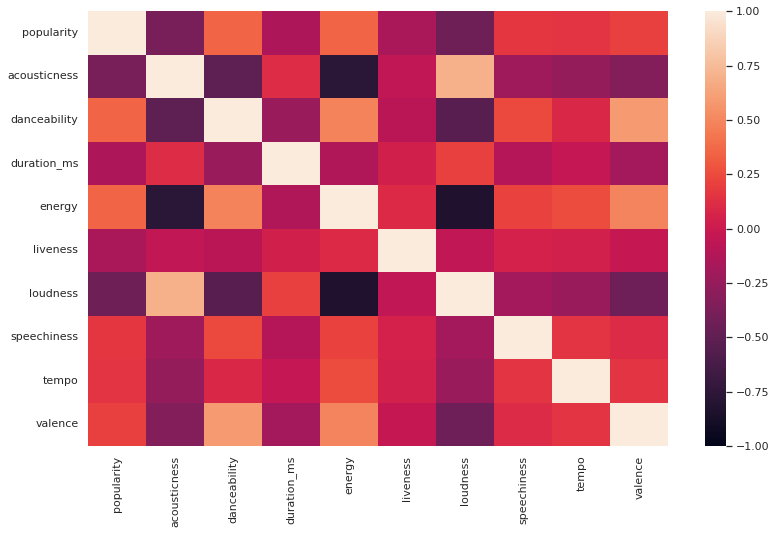

In [75]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.heatmap(df.corr(),vmin=-1, vmax=1)

Un dato que nos resulto interesante analizar es la media de tiempo de las canciones que se encuentran en el dataset.

In [76]:
durations = df[["duration_ms"]]
durations["duration_seg"] = durations["duration_ms"] / 1000
durations

/tmp/ipykernel_9814/3102000834.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



duration_ms  duration_seg
0         190440       190.440
1         208787       208.787
2         222653       222.653
3         220573       220.573
4         200773       200.773
..           ...           ...
995       146693       146.693
996       175427       175.427
997       303640       303.640
998       246787       246.787
999       200533       200.533

[1000 rows x 2 columns]

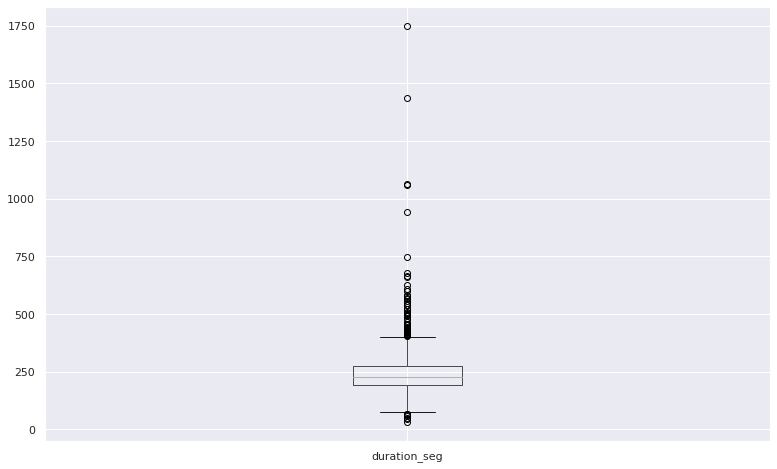

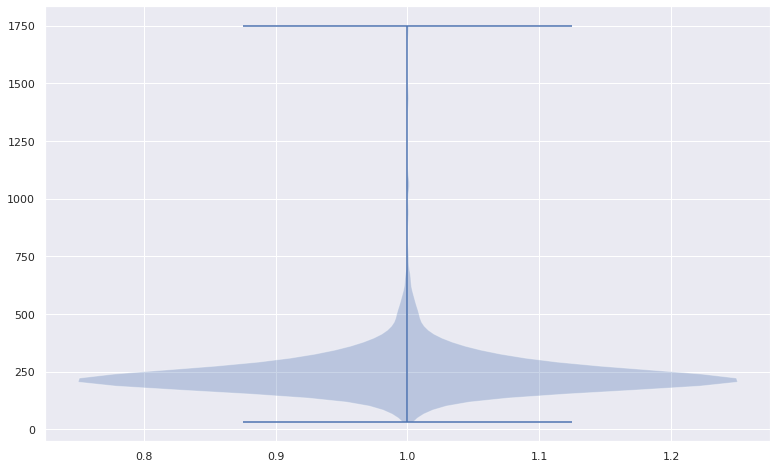

In [77]:
durations.boxplot(column=["duration_seg"])

fig, axes = plt.subplots()

axes.violinplot(dataset = [durations["duration_seg"]] )

plt.show()

Este boxplot nos muestra que casi la totalidad de las canciones tienen una duracion entre 100 y 400 segundos y que la media de duracion es aproximadamente menor a 240 segundos. El violinplot, por otro lado, muestra que la cantidad de canciones con una duracion similar a la media es extremadamente alta.

Otro dato interesante y que nos sera util para una de nuestras preguntas es la media de energia segun el genero, donde podemos apreciar una gran diferencia entre clasico y opera con respecto al resto de los generos.

<AxesSubplot:xlabel='genre'>

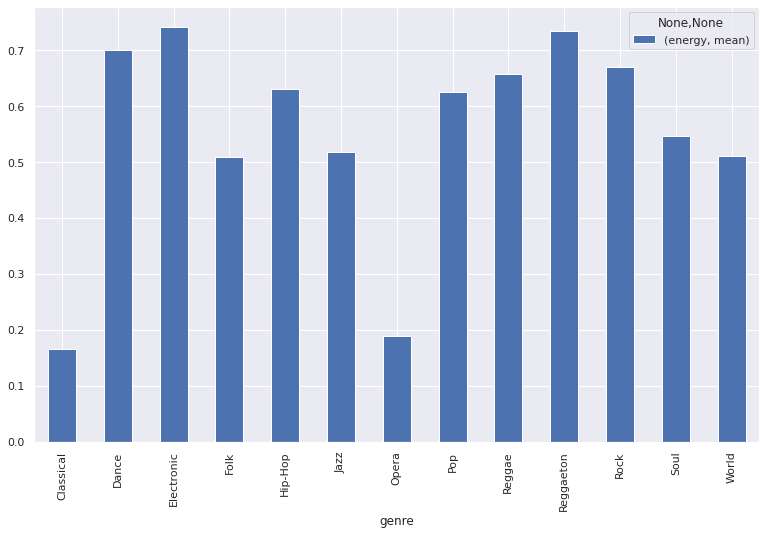

In [78]:
df.groupby("genre").agg({'energy': ['mean']}).plot.bar()

Un resultado esperado era que a mayor cantidad de publico mayor fuese la energia transmitida. Sin embargo, en el siguiente grafico podemos ver claramente que estas 2 variables no estan relasionadas. Al ver estos resultados, nos surge la hipotesis de que la energia tiene relacion con alguna otra variable que tenemos en el dataframe. Esto se continuara en la parte de preguntas.

<AxesSubplot:xlabel='genre'>

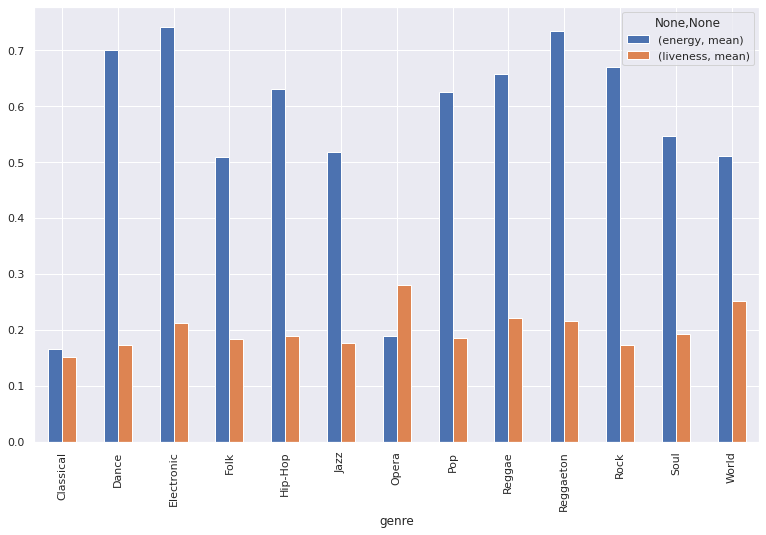

In [79]:
df.groupby("genre").agg({'energy': ['mean'], "liveness": ["mean"]}).plot.bar()

Ademas de ver algunos valores, se pueden comparar para obtener informacion relevante de los mismos. En un primer ejemplo podemos obtener las medias de energia y positividad segun el genero.

<AxesSubplot:xlabel='genre'>

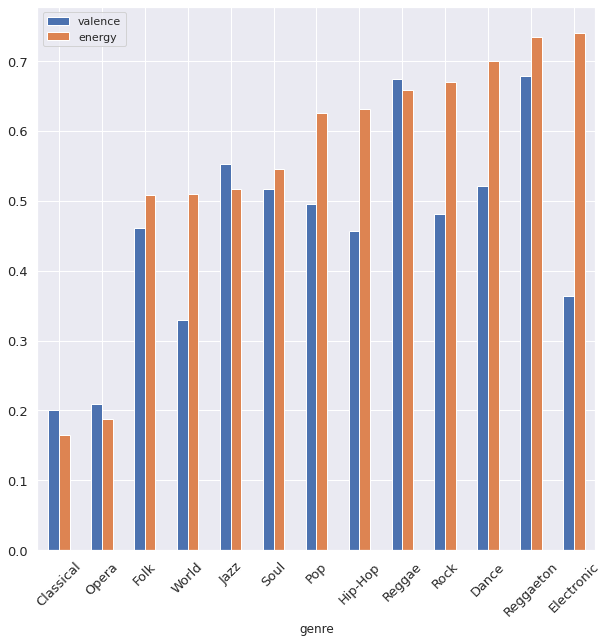

In [80]:
df_1 = df[['genre', 'valence', 'energy']]

df_a_usar = df_1.groupby(['genre'])\
                .mean()\
                .sort_values(by=['energy'])
df_a_usar.plot.bar(figsize = (10,10), fontsize = 13, rot = 45)

Una primera conclusion que puede obtenerse de este grafico es que nunca la positividad de un genero es mucho mayor a la energia que transmite, pero si puede darse el caso contrario siendo electronica el ejemplo con mayor diferencia.

Otro dato interesante para analizar es la popularidad por genero. para ver esto usamos un grafico de densidad donde superponemos los resultados segun el genero para poder realizar una comparacion visual.
Al haber muchos generos, vemos una notable diferencia entre opera y los demas, siendo este el genero menos popular con diferencia. Ademas de ser el de menor popularidad, sus valores se concentran en el valor 10, el cual es muy bajo. Esto comportamiento es identico al del genero mas popular, pop.
Aun asi, otros generos no tienen una densidad tan alta en un determinado valor de popularidad. El ejemplo mas claro es el Reggaeton, el cual tiene una densidad que tiende a ser mucho mas normalizada que la de los generos ya mencionados.

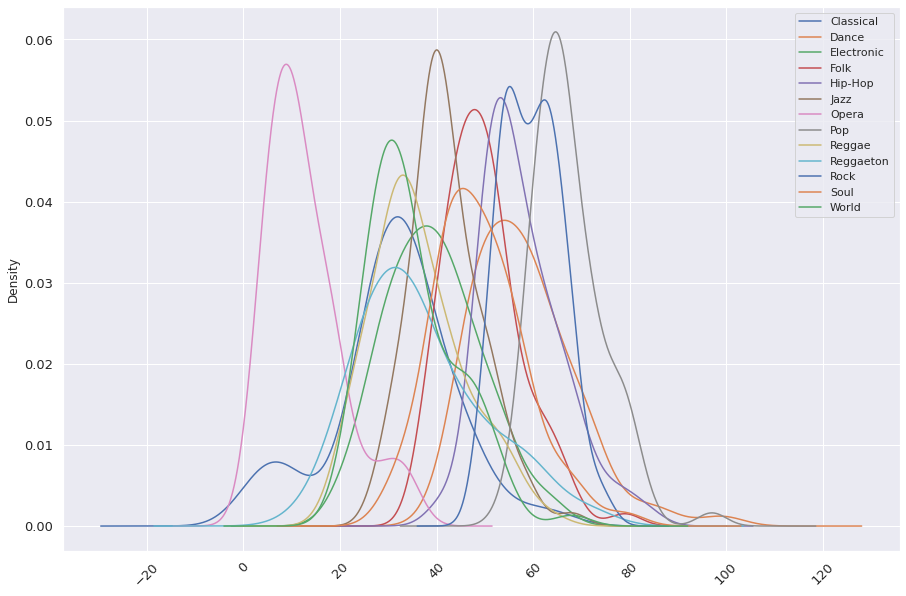

In [81]:
df_2 = df[['genre', 'popularity']]
df_a_usar_2 = df_2.groupby(['genre'])["popularity"]
df_a_usar_2.plot.kde(figsize = (15,10), fontsize = 13, rot = 45)
plt.legend()

Si sumamos todas las distribuciones, la resultante debería ser normal por el teorema central del límite. Esto efectivamente ocurre al ver la distribución general de la popularidad:

array([[<AxesSubplot:xlabel='popularity', ylabel='popularity'>]],
      dtype=object)

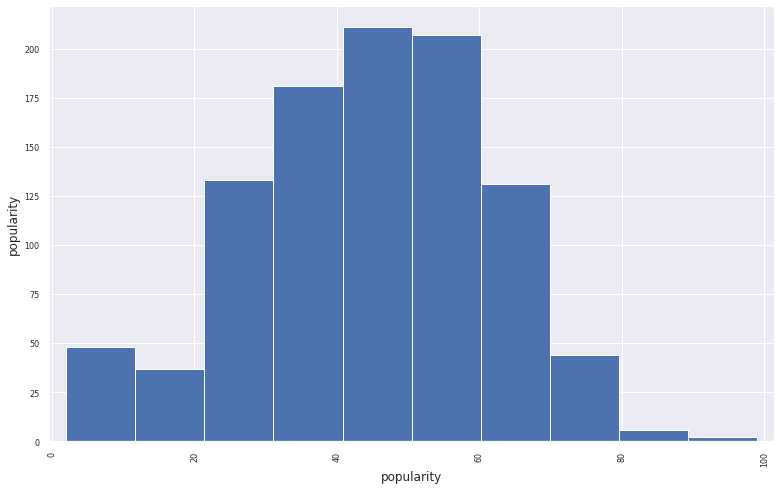

In [82]:
pd.plotting.scatter_matrix(df[['genre', 'popularity']], alpha=0.2)

### 2) Preguntas

Planteamos las siguientes incógnitas a resolver:

- ¿Existe una relación entre lo "bailable" y enérgica que puede resultar una canción?
- ¿Aporta la acústica de una canción a su popularidad?

### 3) Respuestas

#### Entre lo Bailable y lo Energético

La hipótesis de la primera pregunta, es que existe una relación entre estas dos columnas ya que uno creería que cuanto más se pueda bailar una canción, mas energía tiene. Después de todo, nadie bailaría sobre obras clásicas o de opera que probablemente se pueden apreciar mejor en un contexto más tranquilo.

Vamos a tomar estos dos features y analizarlos en función del género musical:

In [83]:
danceability_and_energy = df[['genre', 'danceability', 'energy']]
danceability_and_energy

genre  danceability  energy
0    Dance          0.73    0.55
1    Dance          0.78    0.61
2    Dance          0.74    0.64
3    Dance          0.59    0.70
4    Dance          0.73    0.65
..     ...           ...     ...
995   Soul          0.59    0.38
996   Soul          0.45    0.64
997   Soul          0.51    0.62
998   Soul          0.67    0.57
999   Soul          0.78    0.38

[1000 rows x 3 columns]

Agrupamos los valores por género y los reducimos tomando la media de los mismos:

In [84]:
avg_danceability_and_energy = danceability_and_energy.groupby(['genre'])\
                                                     .mean()\
                                                     .sort_values(by=['danceability'])
avg_danceability_and_energy

danceability    energy
genre                             
Opera           0.296111  0.188472
Classical       0.305556  0.165556
World           0.458228  0.510380
Folk            0.521250  0.508125
Rock            0.540125  0.670250
Jazz            0.592346  0.517531
Electronic      0.626173  0.740741
Soul            0.632031  0.545937
Dance           0.644400  0.700267
Pop             0.645976  0.625244
Reggae          0.693816  0.658158
Hip-Hop         0.713875  0.631375
Reggaeton       0.745256  0.735000

<AxesSubplot:xlabel='genre'>

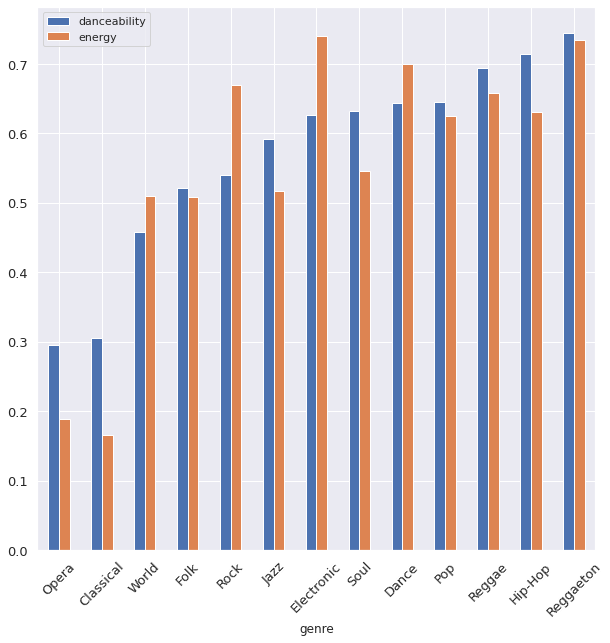

In [85]:
avg_danceability_and_energy.plot.bar(figsize = (10,10), 
                                     fontsize = 13, 
                                     rot = 45)

Podemos contemplar que cuanto más bailable es una canción, más enérgica suele ser. Esto tiene sentido pues es esperable que un género como el Reggaeton sea más "vivo" (bailable y enérgico) que la Opera.

Esto al fin y al cabo es una tendencia y no necesariamente se aplica a todos los casos. El rock que es menos bailable que el jazz, es más enérgico que este único. Podemos ver más limpiamente como esta tendencia aparece analizando los valores absolutos de las diferencias.

Esto se puede realizar gracias a que los dos features tienen valores que entran en el mismo rango de cero a uno:

In [86]:
peak_danceability_and_energy = danceability_and_energy.groupby(['genre'])\
                                                      .agg({'danceability': ['min', 'max'],
                                                            'energy': ['min', 'max']})
peak_danceability_and_energy

danceability       energy      
                    min   max    min   max
genre                                     
Classical          0.09  0.69   0.00  0.98
Dance              0.23  0.86   0.32  0.96
Electronic         0.24  0.93   0.21  1.00
Folk               0.26  0.80   0.06  0.99
Hip-Hop            0.45  0.91   0.11  0.95
Jazz               0.20  0.91   0.14  0.87
Opera              0.08  0.60   0.01  0.51
Pop                0.33  0.94   0.23  0.94
Reggae             0.38  0.95   0.30  0.95
Reggaeton          0.44  0.93   0.43  0.95
Rock               0.22  0.79   0.09  0.98
Soul               0.35  0.88   0.03  0.93
World              0.11  0.83   0.00  0.99

In [87]:
(peak_danceability_and_energy.danceability["max"].max() <= 1) and\
(peak_danceability_and_energy.energy["max"].max() <= 1) and\
(peak_danceability_and_energy.danceability["min"].min() >= 0) and\
(peak_danceability_and_energy.energy["min"].min() >= 0)

True

Al ser valores que viven en un mismo rango acotado, podemos computar la diferencia:

In [88]:
avg_danceability_and_energy

danceability    energy
genre                             
Opera           0.296111  0.188472
Classical       0.305556  0.165556
World           0.458228  0.510380
Folk            0.521250  0.508125
Rock            0.540125  0.670250
Jazz            0.592346  0.517531
Electronic      0.626173  0.740741
Soul            0.632031  0.545937
Dance           0.644400  0.700267
Pop             0.645976  0.625244
Reggae          0.693816  0.658158
Hip-Hop         0.713875  0.631375
Reggaeton       0.745256  0.735000

In [89]:
danceability_and_energy_diff = avg_danceability_and_energy.copy()
danceability_and_energy_diff['diff'] = abs(danceability_and_energy_diff['danceability'] - danceability_and_energy_diff['energy'])
danceability_and_energy_diff = danceability_and_energy_diff[danceability_and_energy_diff.columns
                                                                                        .drop(['danceability', 'energy'])]
danceability_and_energy_diff

diff
genre               
Opera       0.107639
Classical   0.140000
World       0.052152
Folk        0.013125
Rock        0.130125
Jazz        0.074815
Electronic  0.114568
Soul        0.086094
Dance       0.055867
Pop         0.020732
Reggae      0.035658
Hip-Hop     0.082500
Reggaeton   0.010256

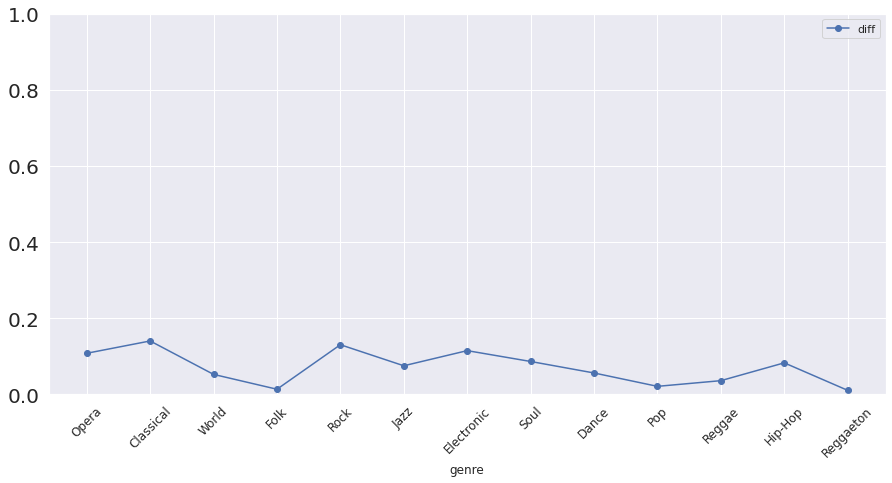

In [90]:
danceability_and_energy_diff.plot.line(figsize = (15,7), 
                                       fontsize = 20, 
                                       rot = 45,
                                       style="-o")
plt.ylim(0, 1)
diff_index = danceability_and_energy_diff.index
plt.xticks(list(range(len(diff_index))), diff_index, fontsize=12)
plt.show()

**Por lo tanto** notamos que en todos los géneros, no existe mucha diferencia entre lo bailable y enérgico que es una canción y entonces *tiende* a cumplirse la hipótesis propuesta.

#### Entre la Acústica y la Popularidad

Esta hipótesis se basa en la creencia de que el público general, cada vez tiende a escuchar géneros músicales menos [acústicos](https://es.wikipedia.org/wiki/M%C3%BAsica_ac%C3%BAstica#:~:text=La%20m%C3%BAsica%20ac%C3%BAstica%20es%20un,la%20manera%20el%C3%A9ctrica%20o%20electr%C3%B3nica.) y más electrónicos. Esto se nutre del dato de que géneros como el Pop y el Rock, son muy populares y poco acústicos a la vez y que la Opera y la música clásica se encuentran en el extremo opuesto del espectro. 

Iniciamos la investigación observando las coordenadas de relación entre las dos columnas:

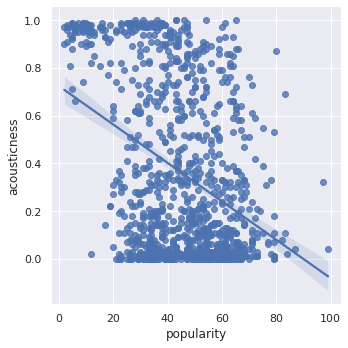

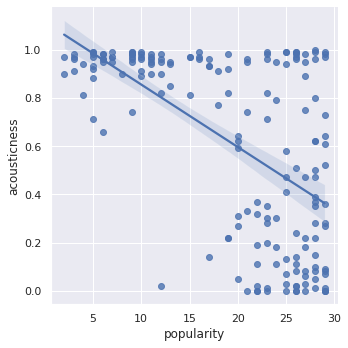

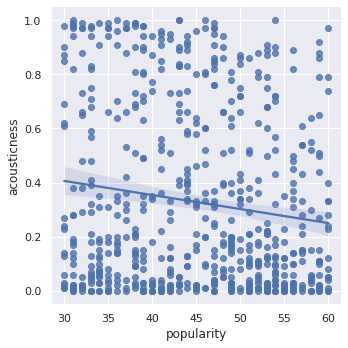

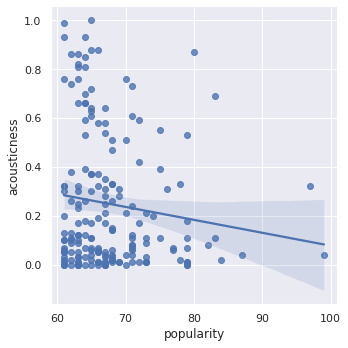

In [91]:
f1 = 'popularity'
sns.lmplot(x = 'popularity', y = 'acousticness', data = df, fit_reg = True) 
sns.lmplot(x = 'popularity', y = 'acousticness', data = df.loc[df[f1] < 30], fit_reg = True) 
sns.lmplot(x = 'popularity', y = 'acousticness', data = df.loc[df[f1].between(30,60)], fit_reg = True) 
sns.lmplot(x = 'popularity', y = 'acousticness', data = df.loc[df[f1] > 60], fit_reg = True) 

Y podemos visualizar que las rectas que mejor se ajustan a estos puntos tienen pendientes negativas, por lo que se puede ver que estos dos features poseen una correlación negativa entre sí.

/tmp/ipykernel_9814/2511742687.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='genre'>

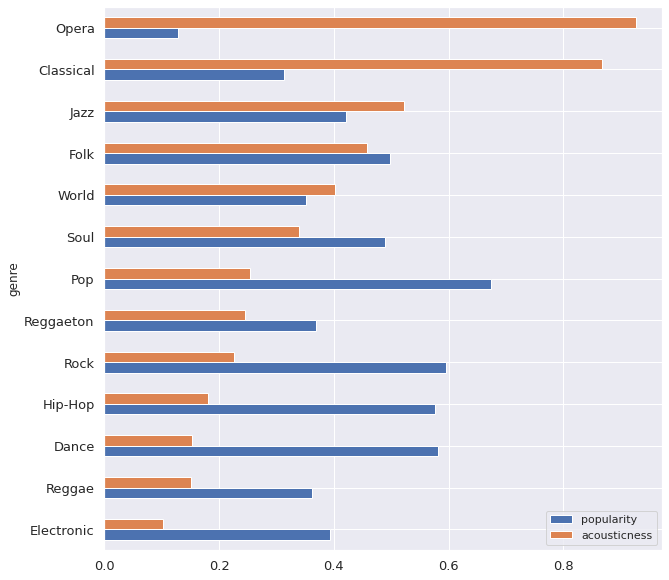

In [92]:
a = df[['genre', 'popularity', 'acousticness']]
a.popularity = a.popularity.apply(lambda p: p/100)
a.groupby('genre').mean().sort_values(by=['acousticness']).plot.barh(figsize = (10,10), fontsize = 13)

No solo en general la correlación es negativa, sino que además, podemos notar que en general cuanto más acústico es un género menos popularidad tiene.